In [25]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
import emcee
import pandas as pd
import scipy.stats as stats
import getdist
from getdist import plots, MCSamples

In [26]:
#number of clusters
#N_CLUSTERS = 99
N_CLUSTERS = 75
# - - - - - - - #
#this sets the run to "just try to see if it works" and to proper code
TEST = 0 #0 to set it to "just try to see if it works"; 
          #1 to set it to "proper code";
          #2 to set it to "overkill" - it probably will die this way
if (TEST == 0):
  DPI = 200
  nwalkers = 100
  niter = 10000
  nburnin = 6000
elif (TEST == 1):
  DPI = 600
  nwalkers = 200
  niter = 80000
  nburnin =  6000
# - - - - - - - #
#fraction of baryonic mass to add to make up for the galaxies
w = 1.0
#w = 1.3
# - - - - - - - #
#TYPE OF MCMC ANALYSIS
ANALYSIS = 0 #0 sets the analysis to the initial study of epsilon_0 and the slope of the BTFR
             #1 sets the analysis to the study with the complete gravitational permittivity
# - - - - - - - #
#NUMBER OF PARAMETERS IN THE MCMC ANALYSIS
#NPARAMS = 1
NPARAMS = 2
#NPARAMS = 3
#NPARAMS = 4

In [27]:
plt.rcParams['font.family'] = 'serif'

if (ANALYSIS == 0):
  if (NPARAMS == 2):
    color_chain = "royalblue"
    color_cornerplot = "navy"
  elif (NPARAMS == 1):
    color_chain = "royalblue"
    color_cornerplot = "navy"
elif (ANALYSIS == 1):
  if (NPARAMS == 2):
    color_chain = "slategrey"
    color_cornerplot = "darkred"
  elif (NPARAMS == 3):
    color_chain = "slategrey"
    color_cornerplot = "darkred"
  elif (NPARAMS == 4):
    color_chain = "slategrey"
    color_cornerplot = "darkred"

In [28]:
PI = math.pi
# acceleration scale for MOND - in units of m/s^2
B_MOND = 1.2e-10 # acceleration scale for MOND - 
                 # in units of m/s^2
G_PC_SM_KM_S = 0.004300917 # gravitational constant - 
                           # in units of parsec/(solar_mass*(km/s)^2)
G_SI = 6.67430e-11 # gravitational constant - 
                   # in units of Nm^2/(kg^2) = m^3/(kg*s^2)
M_S = 1.98840987e30 # solar mass - 
                    # in units of kg 
PC = 3.08567758e16 # parsec value - 
                   # in units of m 
m_p = 938.27208816 #proton mass - 
                   # in units of MeV/c^2
m_p_kg = 1.67262192e-27 #in units of kg
c_speed = 299792.458 # speed of light - 
                     # in units of km/s
mu = 0.58 # mean molecular weight
OMEGA_M = 0.3 # mass density parameter
OMEGA_L = 0.7 # dark energy density parameter
h_0 = 0.7 # Hubble parameter
lambda_cooling = 0.843e-23 #in units of erg/s cm^3

In [29]:
#parameters obtained by Cesare et al. 2022 for elliptical galaxies
CesEll_eps0 = 0.089
unc_CesEll_eps0_p = 0.038
unc_CesEll_eps0_m = 0.035
CesEll_rhoc = -24.25
unc_CesEll_rhoc_p = 0.28
unc_CesEll_rhoc_m = 0.20
CesEll_Q = 0.47
unc_CesEll_Q_p = 0.29
unc_CesEll_Q_m = 0.21
#parameters obtained by Cesare et al. 2020 for disk galaxies
CesDisk_eps0 = 0.56
unc_CesDisk_eps0 = 0.16
CesDisk_rhoc = -25.30
unc_CesDisk_rhoc = 1.22
CesDisk_Q = 0.92
unc_CesDisk_Q = 0.71
#slope of the BTFR
slope_BTFR = 3.98
unc_slope_BTFR_p = 0.12
unc_slope_BTFR_m = 0.12

In [30]:
## DATA ##
if (N_CLUSTERS == 99):
  names = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/lists_clusters_99.txt', dtype=str)
  # X-ray LUMINOSITY
  L = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/luminosity_99.txt') # in units of 10^44 erg/s
  sigma_L = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/uncertainty_L_99.txt') # in units of 10^44 erg/s
  #RADIUS ------> obtained from Sohn et al. 2020
  R = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/radius_99.txt') # radius R_500 in units of Mpc
  sigma_R = R * 0.50 # in units of [Mpc]
  #TEMPERATURE of X-RAY GAS ----> obtained from Sohn et al. 2020
  T = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/temperature_99.txt') #in units of [keV]
  sigma_T = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/uncertainty_Temperature_99.txt') #in units of [keV]
  #VELOCITY DISPERSIONS ---> obtained from Sohn et al. 2020
  vel_disp = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/velocity_dispersion_99.txt') #in units of [km/s]
  sigma_vel_disp = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/uncertainty_vel_dispersion_99.txt')
  #redshift
  z = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/dati_finali_99/redshift_99.txt')
elif (N_CLUSTERS == 75):
  names = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/lists_clusters_75.txt', dtype=str)
  # X-ray LUMINOSITY
  L = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/luminosity_75.txt') # in units of 10^44 erg/s
  sigma_L = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/uncertainty_L_75.txt') # in units of 10^44 erg/s
  #RADIUS ------> obtained from Sohn et al. 2020
  R = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/radius_75.txt') # radius R_500 in units of Mpc
  sigma_R = R * 0.50 # in units of [Mpc]
  #TEMPERATURE of X-RAY GAS ----> obtained from Sohn et al. 2020
  T = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/temperature_75.txt') #in units of [keV]
  sigma_T = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/uncertainty_Temperature_75.txt') #in units of [keV]
  #VELOCITY DISPERSIONS ---> obtained from Sohn et al. 2020
  vel_disp = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/velocity_dispersion_75.txt') #in units of [km/s]
  sigma_vel_disp = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/uncertainty_vel_dispersion_75.txt')
  #redshift
  z = loadtxt('/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_final_purged/redshift_75.txt')

In [31]:
path_folder_tables = '/Users/anvi/computer_science_study/codice_tesi/code_plots/latex_tabs/'
path_folder_cornerplots = '/Users/anvi/computer_science_study/codice_tesi/code_plots/posterior_distribution_plots/'
path_folder_cornerplots_130 = '/Users/anvi/computer_science_study/codice_tesi/code_plots/posterior_distribution_plots_130/'
path_folder_histograms = '/Users/anvi/computer_science_study/codice_tesi/code_plots/histograms/'
path_folder_plots = '/Users/anvi/computer_science_study/codice_tesi/code_plots/plots_M_vs_V/'
path_folder_profiles = '/Users/anvi/computer_science_study/codice_tesi/code_plots/profiles/'
path_folder = '/Users/anvi/computer_science_study/codice_tesi/code_plots/'

In [32]:
print("OBTAINING THE BARYONIC MASS USING LUMINOSITY, RADIUS, TEMPERATURE...")
print("- - - - -")
# This shows the steps to obtain the baryonic mass
C = np.sqrt((1e44*4*PI*mu*mu*PC*PC*PC*1e24*m_p_kg*m_p_kg)/(3*lambda_cooling*M_S*M_S))
Mass_SM = C * T**(-0.2) * L**0.5 * R**1.5
dM_dT = C * np.sqrt(L) * R * np.sqrt(R) * 0.2 * T**(-1.2)
dM_dR = C * T**(-0.2) * 1.5 * np.sqrt(L) * np.sqrt(R)
dM_dL = C * T**(-0.2) * 0.5 * L**(-0.5) * R * np.sqrt(R)
print("Mass of clusters in sample in units of solar masses")
print("- - - - -")
print(Mass_SM)
print("OBTAINING THE BARYONIC MASS UNCERTAINTY...")
print("- - - - -")
sigma_Mass_SM = np.sqrt((dM_dT*dM_dT*sigma_T*sigma_T + dM_dL*dM_dL*sigma_L*sigma_L + dM_dR*dM_dR*sigma_R*sigma_R))
print("RELATIVE UNCERTAINTY: ")
print("- - - - -")
rel_err_mass = sigma_Mass_SM/Mass_SM
print(rel_err_mass)
mean_error_mass_formula = np.mean(rel_err_mass)
print("MEAN RELATIVE UNCERTAINTY:")
print("- - - - -")
print(mean_error_mass_formula)
print("- - - - -")
print(f"Mass employed, with w = {w}")
print(Mass_SM*w)

OBTAINING THE BARYONIC MASS USING LUMINOSITY, RADIUS, TEMPERATURE...
- - - - -
Mass of clusters in sample in units of solar masses
- - - - -
[1.27419456e+13 2.81813079e+13 1.95963743e+13 1.47585035e+13
 1.34164582e+13 1.45941734e+13 3.73839747e+13 1.13032354e+13
 2.78325661e+13 4.07433093e+13 1.13832259e+13 1.35884568e+13
 2.24820207e+13 1.64053898e+13 1.32254762e+13 1.39481115e+13
 5.61531862e+13 1.57882048e+13 1.14184997e+13 1.53308902e+13
 1.80923092e+13 1.16744110e+13 1.65141386e+13 2.40385751e+13
 1.91200162e+13 1.59234797e+13 2.82822417e+13 2.00452361e+13
 6.08233416e+13 1.35784509e+13 3.14261792e+13 1.52115645e+13
 2.13268699e+13 2.26998477e+13 1.58635133e+13 2.62954721e+13
 3.16214975e+13 2.31765869e+13 2.33477610e+13 2.36571965e+13
 2.68119275e+13 2.59994408e+13 2.96352550e+13 2.44303996e+13
 2.14984101e+13 3.89540226e+13 2.74185762e+13 3.33809044e+13
 3.65759010e+13 2.48986973e+13 2.58200495e+13 2.89464913e+13
 3.71614110e+13 3.19283777e+13 5.25420395e+13 4.97714908e+13
 6.48

In [33]:
print("M_min = ", np.min(Mass_SM/1e13), " x 10^13 M_sun")
print("M_max = ", np.max(Mass_SM/1e13), " x 10^13 M_sun")
print("M_mean = ", np.mean(Mass_SM/1e13), " x 10^13 M_sun")

M_min =  1.1303235431647924  x 10^13 M_sun
M_max =  9.970208248895064  x 10^13 M_sun
M_mean =  3.129540034816666  x 10^13 M_sun


In [34]:
print("BETA-VALUE")
beta = np.array([])
beta = (vel_disp*vel_disp*m_p*mu*1e3)/(T*c_speed*c_speed)
mean_beta = np.mean(beta)
print("MEAN VALUE OF BETA = ", mean_beta)
print(beta)
print(np.min(beta))
print(np.max(beta))

BETA-VALUE
MEAN VALUE OF BETA =  0.7988593940384144
[0.83721256 0.6227671  0.74566277 0.75501746 1.05635102 0.73358863
 0.56556238 0.47541349 0.99805936 0.58267374 1.07339833 0.6601358
 1.02414193 0.59598526 0.65088097 0.98331085 0.67315002 0.47145469
 0.33099169 1.40925334 0.6893497  0.65145634 0.35987881 0.80126074
 0.68572677 0.36168817 0.39104156 0.6169406  0.36290805 0.87966153
 0.93292219 0.59324703 0.52475959 1.07986193 0.43626471 0.73257007
 0.99434871 0.47790847 0.42653349 0.87338806 1.29752149 0.71457732
 1.4441229  0.34826007 0.35339062 0.5580666  0.33187878 0.77378611
 0.47817591 0.95426292 0.69341912 0.63685247 0.58073503 0.47441228
 0.49456552 0.44897815 0.87016953 0.91214418 0.47252368 1.20152463
 0.68628392 0.67517873 0.81668023 0.38653785 1.12621193 1.3553498
 1.65707521 0.65067497 2.69417394 1.50833479 1.01978791 2.02851273
 1.10203462 0.44887122 1.60265148]
0.3309916866863607
2.694173942441033


In [35]:
array_L_for_table = [f"{value:.3g}" for value in L]
array_sigma_L_for_table = [f"{value:.3g}" for value in sigma_L]
array_R_for_table = [f"{value:.3g}" for value in R]
array_sigma_R_for_table = [f"{value:.3g}" for value in sigma_R]
array_T_for_table = [f"{value:.3g}" for value in T]
array_sigma_T_for_table = [f"{value:.3g}" for value in sigma_T]
array_v_for_table = [f"{value:.4g}" for value in vel_disp]
array_sigma_v_for_table = [f"{value:.3g}" for value in sigma_vel_disp]
array_M_for_table = [f"{value:.4g}" for value in Mass_SM/(1e12)]
array_sigma_M_for_table = [f"{value:.4g}" for value in sigma_Mass_SM/(1e12)]
array_z_for_table = [f"{value:.3g}" for value in z]

table = {'Cluster Name': names,  
         r'L_X': array_L_for_table, 
         r'\sigma_L_X': array_sigma_L_for_table,
         r'$\sigma_V$': array_v_for_table, 
         r'$\sigma__{\sigma_V}$': array_sigma_v_for_table,
         r'T': array_T_for_table, 
         r'$\sigma_T$': array_sigma_T_for_table,
         r'R': array_R_for_table,
         r'M_{bar}': array_M_for_table, 
         r'\sigma_M': array_sigma_M_for_table}
if (w == 1.0):
    df = pd.DataFrame(table)
    name_file = f"table_initial_mass_iN1e12_{N_CLUSTERS}_clusters.tex"
    with open(path_folder_tables + name_file, 'w') as f:
        f.write(df.to_latex(index=False))

In [36]:
rho_0_SI = np.array([]) #this is the initial density value used for the Cavaliere-Fusco-Femiano model for isothermal sphere. 

def integrand(x, beta): 
  exp = -1.5*beta
  return (x*x)*(1+x*x)**(exp) #this results the beta-model by Fusco-Femiano with beta = 1
R_500 = R #in Mpc - withcentration radius with delta = 500
r_scale = 0.25 #in Mpc
print("SCALE RADIUS = ", r_scale, "Mpc")
print("OBTAINING THE CENTRAL DENSITY FOR EACH CLUSTER")
for i in range(len(R)):
  x_values = np.linspace(0, R_500[i]/r_scale, num=10000)
  integrand_values = integrand(x_values, beta[i])
  I = np.trapz(integrand_values, x_values)
  M_500 = w*Mass_SM[i]
  density = M_500/(4*PI*I*(r_scale**3))
  density_SI_ = ((density*M_S*1e3)/(1e18*1e6*PC**3))
  rho_0_SI = np.append(rho_0_SI, density_SI_)

print("CENTRAL MASS DENSITY OF EACH CLUSTER")
print(rho_0_SI)
print("IN UNITS OF g/cm3")
print("MASS OF EACH CLUSTE AS INFERRED FROM THE FORMULA")
print(Mass_SM)
print("IN UNITS OF Solar Mass")

SCALE RADIUS =  0.25 Mpc
OBTAINING THE CENTRAL DENSITY FOR EACH CLUSTER
CENTRAL MASS DENSITY OF EACH CLUSTER
[2.91231097e-27 2.65274123e-27 3.12374951e-27 2.63668216e-27
 5.07682321e-27 2.44594908e-27 2.66607121e-27 1.09539865e-27
 7.75449457e-27 3.02493860e-27 4.66470627e-27 1.94102548e-27
 7.04061915e-27 1.92827963e-27 1.89210489e-27 4.44960635e-27
 5.00680245e-27 1.29378965e-27 7.28333759e-28 1.18014390e-26
 2.56576312e-27 1.77297463e-27 9.26759486e-28 4.14876983e-27
 2.62513852e-27 9.87561726e-28 1.33419288e-27 2.25597432e-27
 1.64810551e-27 3.38631312e-27 7.34360056e-27 1.76174188e-27
 1.82271751e-27 8.25403304e-27 1.17160088e-27 3.66206037e-27
 8.68638889e-27 1.61538409e-27 1.37722155e-27 5.16204010e-27
 1.52660351e-26 3.57085684e-27 2.25574330e-26 1.06042345e-27
 1.07963414e-27 2.77280105e-27 1.08808668e-27 5.04174060e-27
 2.11456774e-27 6.52930648e-27 3.34545773e-27 3.02262224e-27
 2.99115894e-27 2.04609024e-27 2.68925716e-27 2.20580481e-27
 1.08301580e-26 8.74564393e-27 2.8310

In [37]:
def integrando(x, beta): 
   exp = -1.5*beta
   return (x*x)*(1+x*x)**(exp)

#variabili per i valori del raggio dell'ammasso
print(" - - - - - - - ")
r_beg = 0.0 #in Mpc
print("RADIUS_BEGIN = ", r_beg, "Mpc")
r_end = 5.0*np.max(R)
print("RADIUS_END = ", r_end, "Mpc")
steps = 10000 #adimensionale
print("STEPS = ", steps)
delta_r = (r_end - r_beg)/(steps)
print("DELTA_r =", delta_r)
print(" - - - - - - - ")

#r = np.linspace(r_beg+delta_r,r_end,steps) #in Mpc
r = np.linspace(r_beg+delta_r,r_end,steps) #in Mpc
x =r/r_scale

density_r_cluster_astro_tot = np.zeros(shape=(len(R),len(r)))
Massa_r = np.zeros(shape=(len(R),len(r)))
phi = np.zeros(shape=(len(R),len(r)))

rho_0_astro_units = np.array([]) #this is the initial density value used for the Cavaliere-Fusco-Femiano model for isothermal sphere.
density_0_astro_units = (rho_0_SI*PC*PC*PC*1e6)/(M_S*1e3) #in M_SUN on pc^3
rho_0_astro_units = np.append(rho_0_astro_units, density_0_astro_units)

init_term = np.array([]) 
init_term = 4*PI*(r_scale*r_scale*r_scale*1e18)*rho_0_astro_units

probed_mass = np.array([])

for i in range(len(R)):
#for i in range(5):
   if (i%10 == 0):
      print("passo ",i," fatto")
   #x = r/r_scale #adimensionale
   density_r_cluster_astro = np.array([])
   b = beta[i]
   for j in range(steps):
      density_r_cluster_astro_tot[i][j] = rho_0_astro_units[i]*(1+x[j]*x[j])**(-1.5*b)
      I_r = quad(integrando, 0, x[j], args=(b))
      cum_integrand = I_r[0]
      Massa_r[i][j] = init_term[i]*cum_integrand #this is the baryonic mass at step i in solar masses
      phi[i][j] = -(G_PC_SM_KM_S*Massa_r[i][j])/(x[j]*r_scale)
   J_r = quad(integrando, 0, (R_500[i]/r_scale), args=(b))
   #J_r = quad(integrando, 0, (R_500[i]), args=(r_scale,b))
   cum_sondata = J_r[0]
   massa_sonda = init_term[i]*cum_sondata
   probed_mass = np.append(probed_mass, massa_sonda)
print(" - - - - - - - ")
print("MASS OBTAINED FROM MASS DENSITY PROFILE: ")
print(probed_mass)
print("in units of SOLAR MASSES")
print(" - - - - - - - ")
print("MEAN RATIO BETWEEN MASS FROM DENSITY PROFILE AND MASS AS A FUNCTION OF LUMINOSITY, RADIUS AND TEMPERATURE")
ratio = probed_mass/(w*Mass_SM)
print(np.mean(ratio))
print(" - - - - - - - ")
#errore_probed_mass = mean_error_mass_formula*probed_mass
errore_probed_mass = rel_err_mass*probed_mass

 - - - - - - - 
RADIUS_BEGIN =  0.0 Mpc
RADIUS_END =  7.0945 Mpc
STEPS =  10000
DELTA_r = 0.00070945
 - - - - - - - 
passo  0  fatto
passo  10  fatto
passo  20  fatto
passo  30  fatto
passo  40  fatto
passo  50  fatto
passo  60  fatto
passo  70  fatto
 - - - - - - - 
MASS OBTAINED FROM MASS DENSITY PROFILE: 
[1.27419456e+13 2.81813079e+13 1.95963743e+13 1.47585035e+13
 1.34164582e+13 1.45941734e+13 3.73839747e+13 1.13032354e+13
 2.78325661e+13 4.07433093e+13 1.13832259e+13 1.35884568e+13
 2.24820208e+13 1.64053898e+13 1.32254762e+13 1.39481115e+13
 5.61531862e+13 1.57882048e+13 1.14184997e+13 1.53308902e+13
 1.80923092e+13 1.16744110e+13 1.65141386e+13 2.40385751e+13
 1.91200162e+13 1.59234797e+13 2.82822416e+13 2.00452361e+13
 6.08233415e+13 1.35784509e+13 3.14261792e+13 1.52115645e+13
 2.13268699e+13 2.26998477e+13 1.58635133e+13 2.62954721e+13
 3.16214975e+13 2.31765868e+13 2.33477610e+13 2.36571965e+13
 2.68119275e+13 2.59994408e+13 2.96352550e+13 2.44303996e+13
 2.14984101e+13 3.8

In [38]:
array_Massprofile_for_table = [f"{value:.3g}" for value in probed_mass/1e12]
array_ratio_masses = [f"{value:.3g}" for value in probed_mass/M_500]
table = {'Cluster Name': names, 
         r'M_{500} with mass profile': array_Massprofile_for_table,
         r'M_{bar}': array_M_for_table,
         r'ratio': array_ratio_masses}
if (w == 1.0):
    df = pd.DataFrame(table)
    name_file = f"table_mass_profile_with_ratio_{N_CLUSTERS}_ammassi.tex"
    with open(path_folder_tables + name_file, 'w') as f:
        f.write(df.to_latex(index=False))

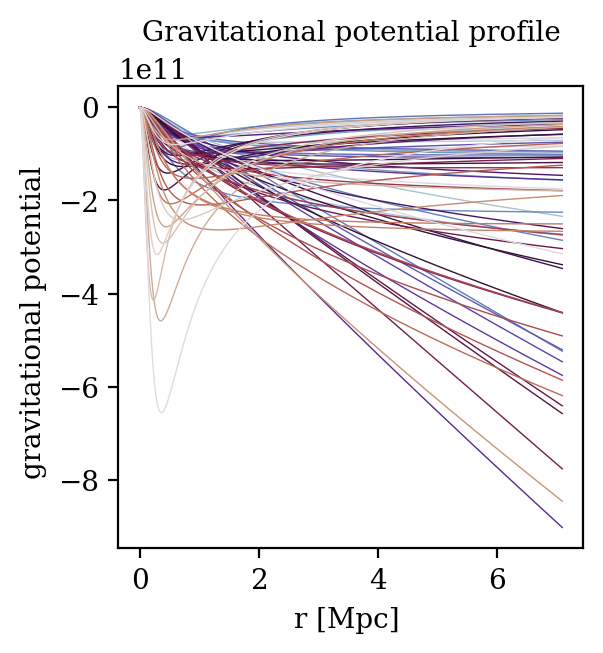

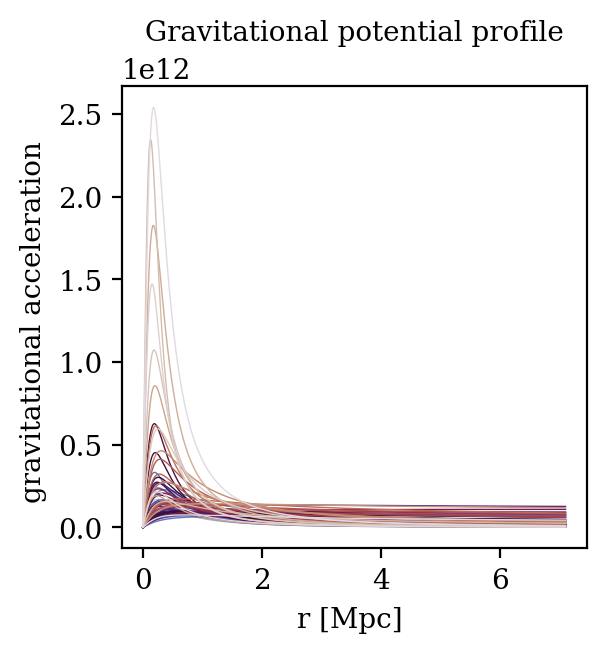

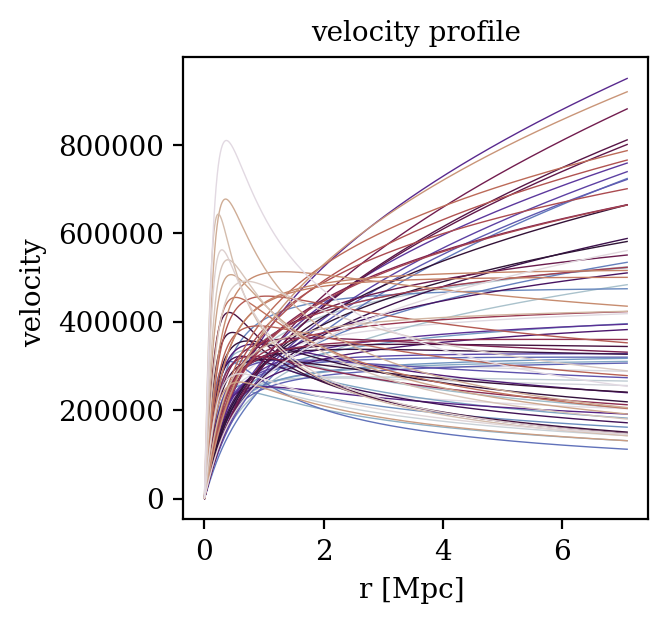

In [39]:
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
m = np.zeros(shape=(len(R),len(r))) # for mass profile
u = np.zeros(shape=(len(R),len(r))) # for density profile
p = np.zeros(shape=(len(R),len(r))) # for radius
gravpot = np.zeros(shape=(len(R),len(r))) # for gravitational potential
accel = np.zeros(shape=(len(R),len(r)))
velocity = np.zeros(shape=(len(R),len(r)))
g_newton = np.zeros(shape=(len(R),len(r)))

for i in range(len(R)):
  rr = 0.25
  for j in range(len(r)):
    p[i][j] = np.log10(r[j]/rr)
    m[i][j] = np.log10(Massa_r[i][j])
    u[i][j] = np.log10(density_r_cluster_astro_tot[i][j]/rho_0_astro_units[i])
    gravpot[i][j] = phi[i][j]
    accel[i][j] = -gravpot[i][j]/(r[j])
    velocity[i][j] = np.sqrt(accel[i][j]*r[j])
    g_newton[i][j] = (G_PC_SM_KM_S*Massa_r[i][j]*Massa_r[i][j])/(R_500[i]*R_500[i])

fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
ax.set_title("Gravitational potential profile", fontsize=10)
ax.set_xlabel(r"r [Mpc] ", fontsize=10)
ax.set_ylabel(r"gravitational potential ", fontsize=10)
for i in range(len(R)):
  ax.plot(r,gravpot[i], color=colors[i], linewidth=0.5)
plt.show()
##########
fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
ax.set_title("Gravitational potential profile", fontsize=10)
ax.set_xlabel(r"r [Mpc] ", fontsize=10)
ax.set_ylabel(r"gravitational acceleration ", fontsize=10)
for i in range(len(R)):
  ax.plot(r,accel[i], color=colors[i], linewidth=0.5) 
plt.show() 
##########
fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
ax.set_title("velocity profile", fontsize=10)
ax.set_xlabel(r"r [Mpc] ", fontsize=10)
ax.set_ylabel(r"velocity ", fontsize=10)
for i in range(len(R)):
  ax.plot(r,velocity[i], color=colors[i], linewidth=0.5)
plt.show()
##########

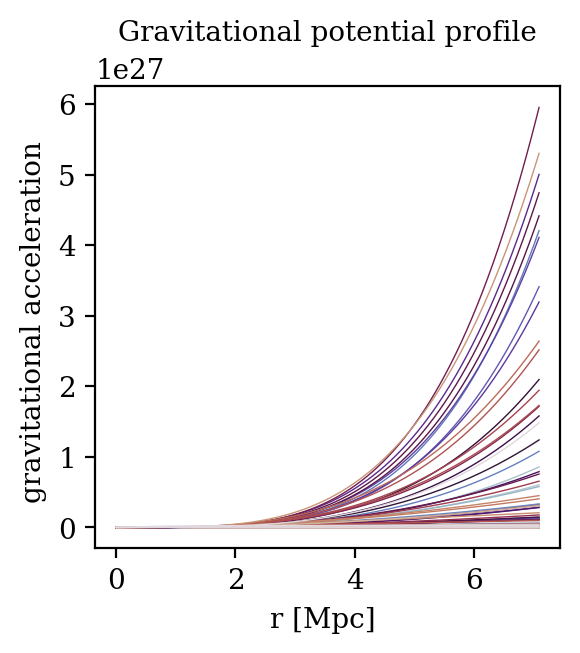

In [40]:
fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
ax.set_title("Gravitational potential profile", fontsize=10)
ax.set_xlabel(r"r [Mpc] ", fontsize=10)
ax.set_ylabel(r"gravitational acceleration ", fontsize=10)
for i in range(len(R)):
  ax.plot(r,accel[i], color=colors[i], linewidth=0.5) 
for i in range(len(R)):
  ax.plot(r,g_newton[i], color=colors[i], linewidth=0.5) 
plt.show() 
##########

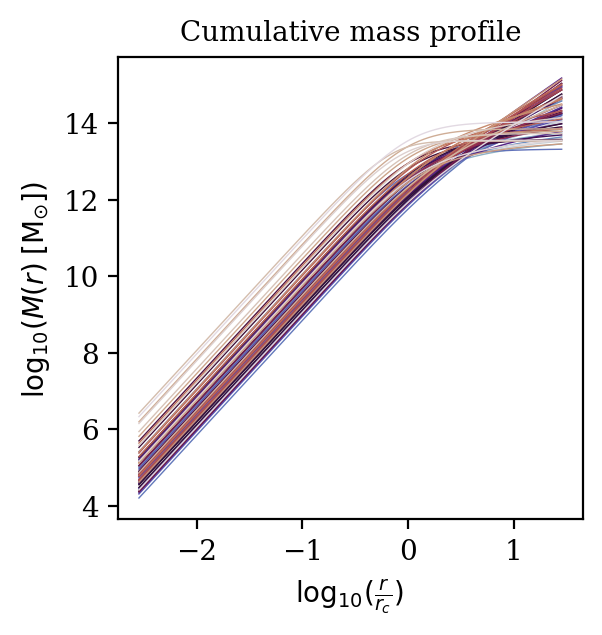

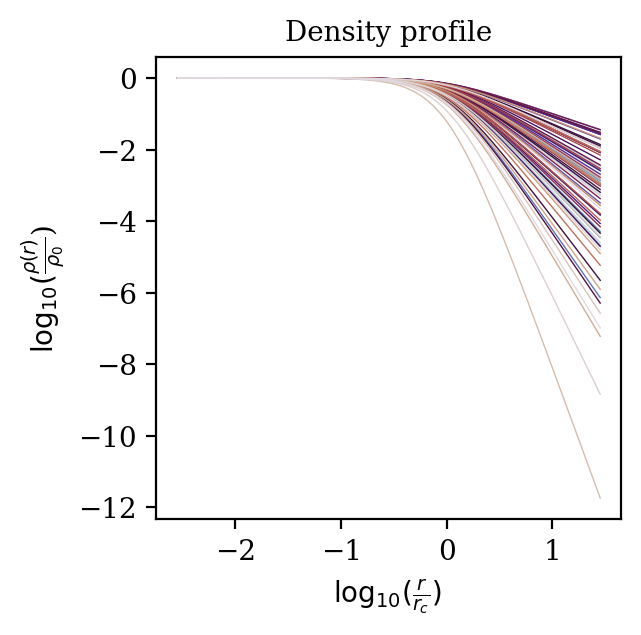

In [41]:
fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))
ax.set_title("Cumulative mass profile", fontsize=10)
ax.set_xlabel(r"$\mathrm{log}_{10}(\frac{r}{r_c})$ ", fontsize=10)
ax.set_ylabel(r"$\mathrm{log}_{10}(M(r) \; [\mathrm{M_{\odot}}])$ ", fontsize=10)
for i in range(len(R)):
  ax.plot(np.log10(r/r_scale),m[i], color=colors[i], linewidth=0.5)
if (w == 1.0):
  plt.savefig(path_folder_profiles + 'mass_profile.png', bbox_inches='tight') 
plt.show()
################
fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
colors = plt.cm.twilight(np.linspace(0, 1, len(R)))

ax.set_title("Density profile", fontsize=10)
ax.set_xlabel(r"$\mathrm{log}_{10}(\frac{r}{r_c})$ ", fontsize=10)
ax.set_ylabel(r"$\mathrm{log}_{10}(\frac{\rho(r)}{\rho_{0}}$)", fontsize=10)
for i in range(len(R)):
  ax.plot(p[i],u[i], color=colors[i], linewidth=0.5)
if (w == 1.0):
  plt.savefig(path_folder_profiles + 'mass_density_profile.png', bbox_inches='tight') 
plt.show()

In [42]:
density_500 = rho_0_astro_units*(1+((R*R)/(r_scale*r_scale)))**(-1.5*beta) #using a beta-model, i obtain the value of density at R=R_500, 
density_500_SI_units = (density_500*(M_S*1e3))/(PC*PC*PC*1e6)
density_500_SI_units_log_10 = np.log10(density_500_SI_units)
print("MASS DENSITY AT R = R_500 FOR EACH CLUSTER")
print(density_500_SI_units_log_10)
print("IN UNITS OF log10(g/cm3)")

MASS DENSITY AT R = R_500 FOR EACH CLUSTER
[-27.977126   -27.8250107  -27.88522475 -27.9105878  -28.11134593
 -27.91130097 -27.75167304 -27.75353096 -28.09475418 -27.74041629
 -28.1062489  -27.8626057  -28.10165724 -27.76458983 -27.84371314
 -28.05519915 -27.78440655 -27.72271247 -27.6941974  -28.28920594
 -27.84311075 -27.84224218 -27.68128985 -27.92564076 -27.84031724
 -27.63715643 -27.64312136 -27.78291241 -27.5985157  -27.99924729
 -27.99619964 -27.80231059 -27.70890854 -28.10681653 -27.70423629
 -27.86331457 -28.04554843 -27.69569057 -27.66975673 -27.92774489
 -28.33909975 -27.81291125 -28.45012266 -27.64666105 -27.62203418
 -27.70881034 -27.61070188 -27.83523554 -27.6413538  -28.00755824
 -27.79933013 -27.76345661 -27.69992525 -27.6101395  -27.63321715
 -27.61541566 -27.8965617  -27.92733853 -27.57572659 -28.19558234
 -27.73174483 -27.72286527 -27.79685113 -27.54713445 -28.16207114
 -28.36803696 -28.8012728  -27.75109198 -30.15206409 -28.51568729
 -28.02418511 -29.1143849  -28.12

In [43]:
print("SETTING THE X AND Y VALUES: X IS THE CIRCULAR VELOCITY OBTAINED BY MULTIPLYING THE VELOCITY DISPERSION \n FOR SQRT(3); Y IS THE BARYONIC MASS OBTAINED WITH THE EQUATION FUNCTION OF LUMINOSITY, RADIUS ecc.")
vel = np.sqrt(3)*vel_disp
sigma_vel = np.sqrt(3)*sigma_vel_disp

v = np.log10(vel)
error_v = sigma_vel/(vel*np.log(10))
if (ANALYSIS == 0):
  Mass = np.log10(w*Mass_SM)
  error_Mass = (sigma_Mass_SM)/(Mass_SM*np.log(10))
elif (ANALYSIS == 1):
  Mass = np.log10(probed_mass)
  error_Mass = rel_err_mass/(np.log(10))
  #error_Mass = mean_error_mass_formula/(np.log(10))

SETTING THE X AND Y VALUES: X IS THE CIRCULAR VELOCITY OBTAINED BY MULTIPLYING THE VELOCITY DISPERSION 
 FOR SQRT(3); Y IS THE BARYONIC MASS OBTAINED WITH THE EQUATION FUNCTION OF LUMINOSITY, RADIUS ecc.


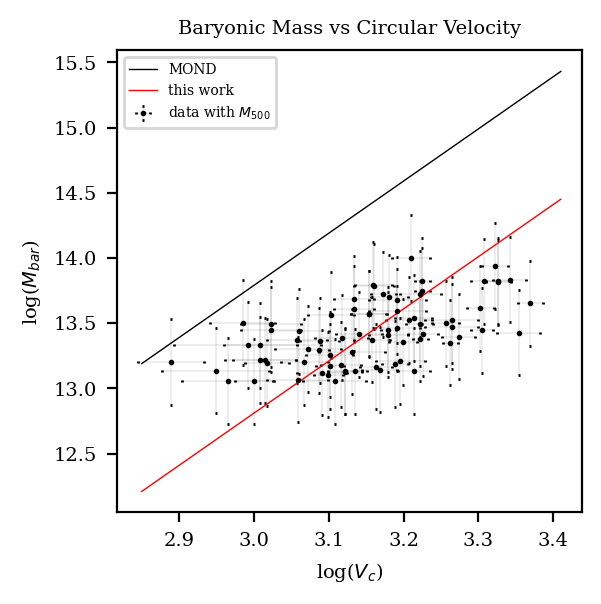

In [44]:
if (ANALYSIS == 0):
  label_mass = "data with $M_{500}$"
elif (ANALYSIS == 1):
  label_mass = "data with $M(\\rho)$"

fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
ax.set_title("Baryonic Mass vs Circular Velocity", 
             fontsize=7)
ax.set_xlabel("log($V_{c}$)", 
              fontsize=7)
ax.set_ylabel("log($M_{bar}$)", 
              fontsize=7)
ax.tick_params(axis='both', 
               labelsize=7)
ax.errorbar(v,Mass,
            error_Mass,
            error_v,
            linestyle="None", 
            linewidth=0.05, 
            marker="o",
            markersize="1", 
            color="black", 
            capsize=0.2,
            label=label_mass)
points = np.linspace(2.85,3.41,1000)
ax.plot(points,1.79+4*points, color="black", label="MOND", linewidth=0.5)
ax.plot(points,0.81+4*points, color="red", label="this work", linewidth=0.5)

ax.legend(loc="upper left", 
          prop={"size":5})
if (w == 1.0):
  plt.savefig(path_folder_plots + 'Mbar_vs_Vc_with_mass_value.png', bbox_inches='tight') 
plt.show()


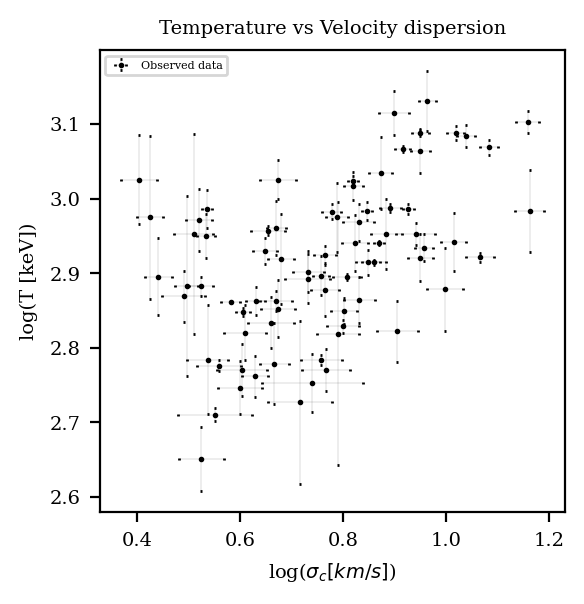

In [45]:
Temp = np.log10(T)
err_Temp = sigma_T/(T*np.log(10))

fig, ax = plt.subplots(figsize=(3,3), 
                       dpi=DPI)
ax.set_title("Temperature vs Velocity dispersion", 
             fontsize=7)
ax.set_xlabel("log($\sigma_{c} [km/s]$)", 
              fontsize=7)
ax.set_ylabel("log(T [keV])", 
              fontsize=7)
ax.tick_params(axis='both', 
               labelsize=7)
ax.errorbar(Temp,np.log10(vel_disp),
            err_Temp,
            sigma_vel_disp/(vel_disp*np.log(10)),
            linestyle="None", 
            linewidth=0.05, 
            marker="o", 
            markersize = 1,
            color="black", 
            capsize=0.2,
            label="Observed data")
ax.legend(loc="upper left", 
          prop={"size":4})
if (w == 1.0):
  plt.savefig(path_folder + 'T_vel_disp.png', bbox_inches='tight') 
plt.show()

In [51]:
velocities_titos = loadtxt("/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_titos/velocities_titos.txt")
v_titos = np.log10(velocities_titos)
masses_titos = loadtxt("/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_titos/masses_titos.txt")
m_titos = np.log10(masses_titos)
velocities_others = loadtxt("/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_galactic_scales/velocities_other_clusters.txt")
masses_others = loadtxt("/Users/anvi/computer_science_study/codice_tesi/data_clusters_general/data_galactic_scales/masses_other_clusters.txt")

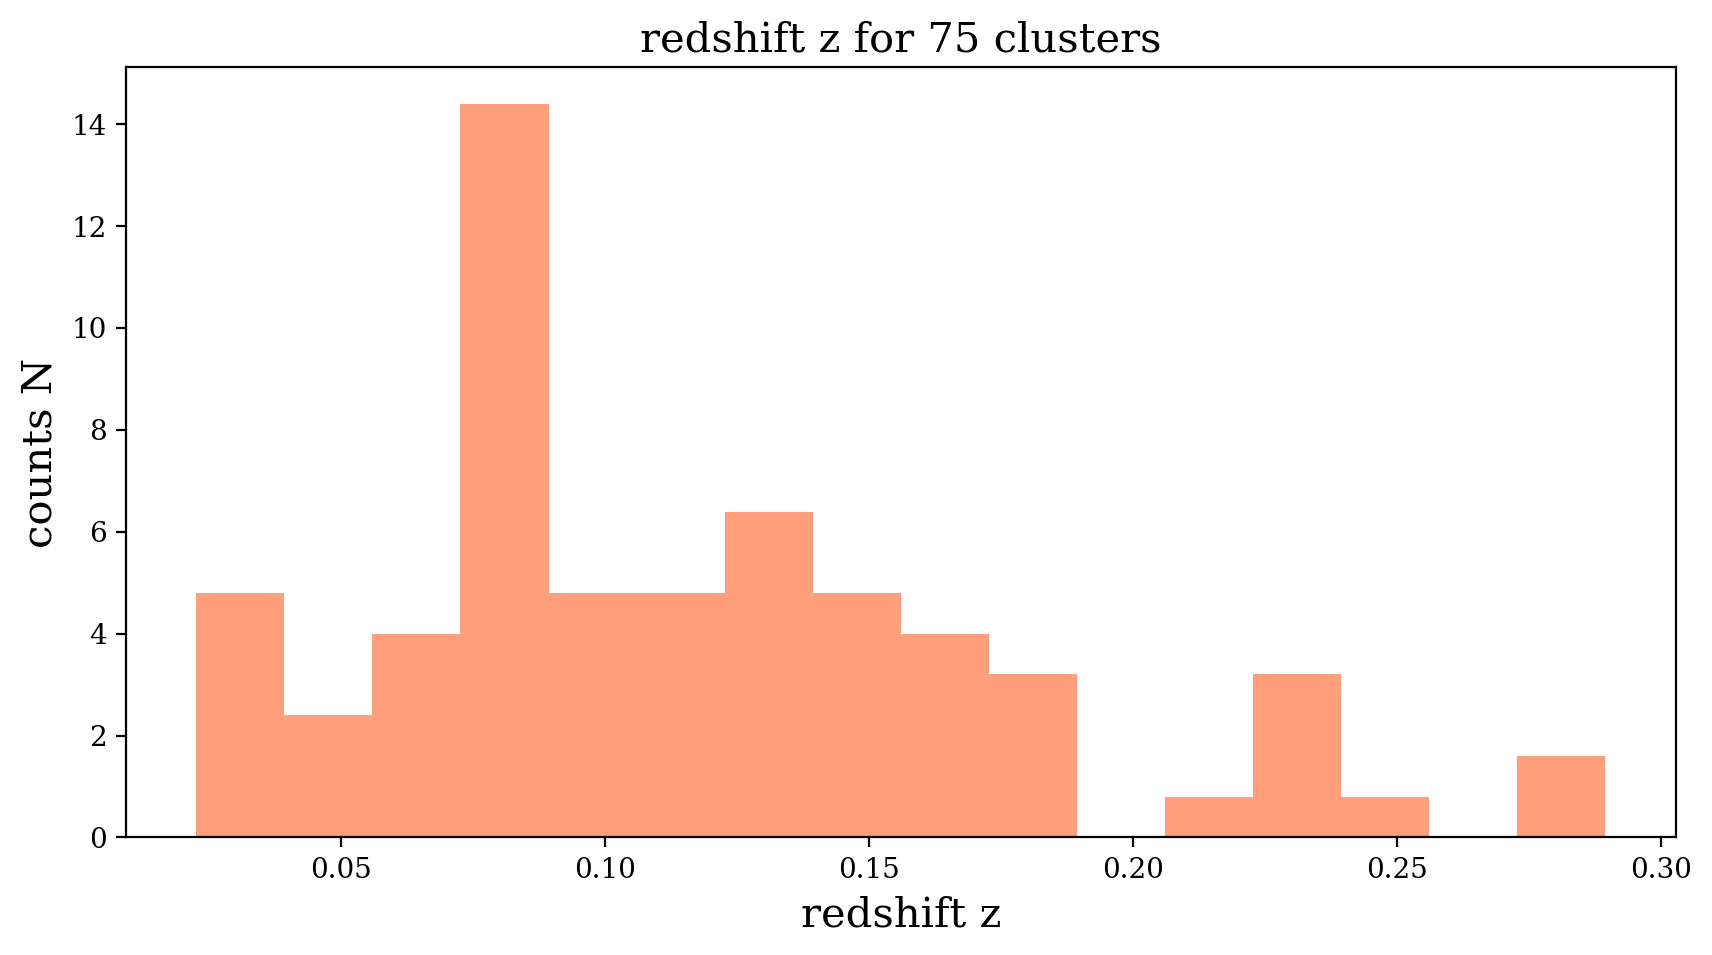

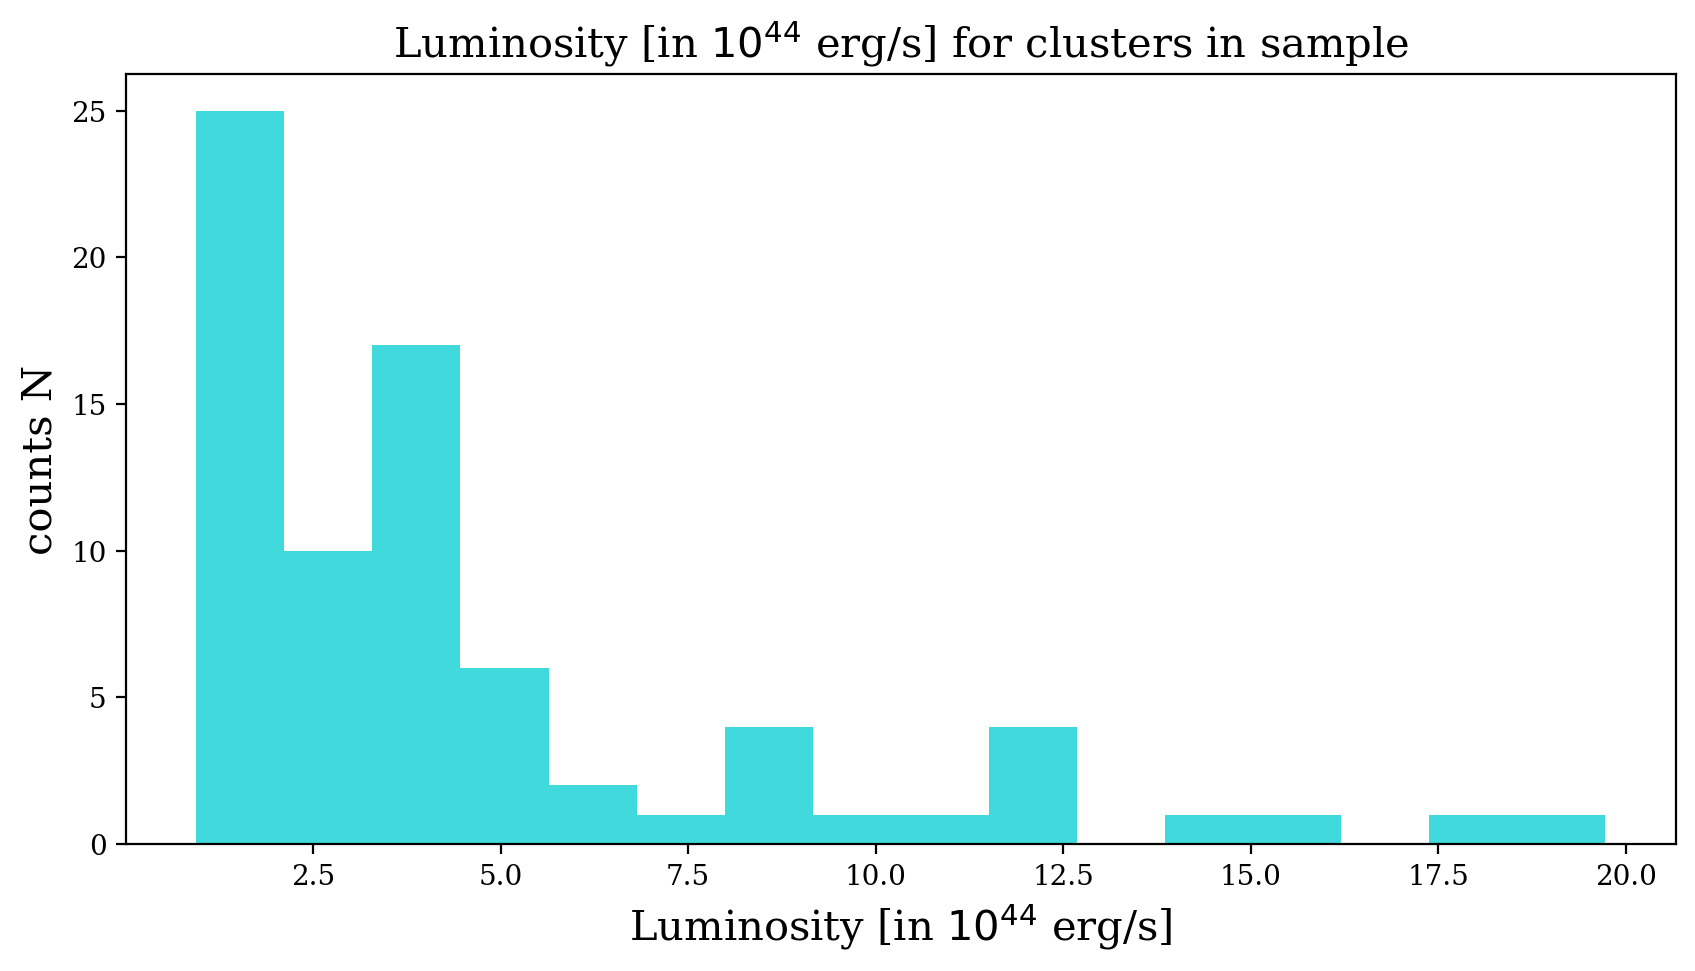

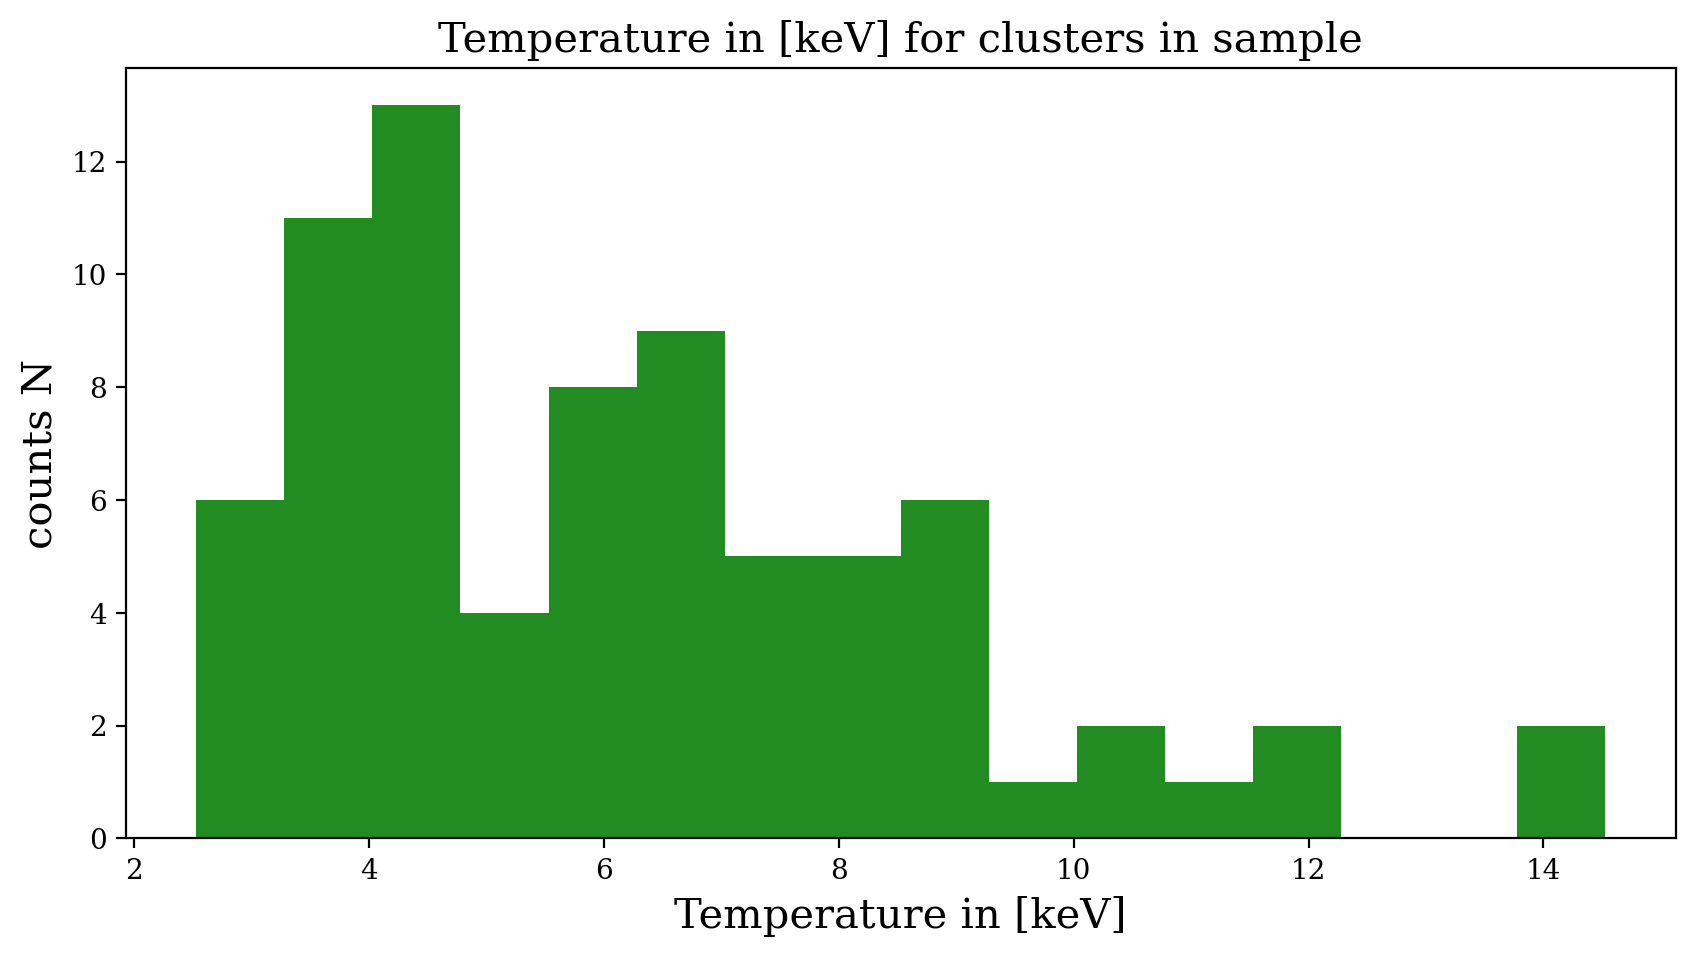

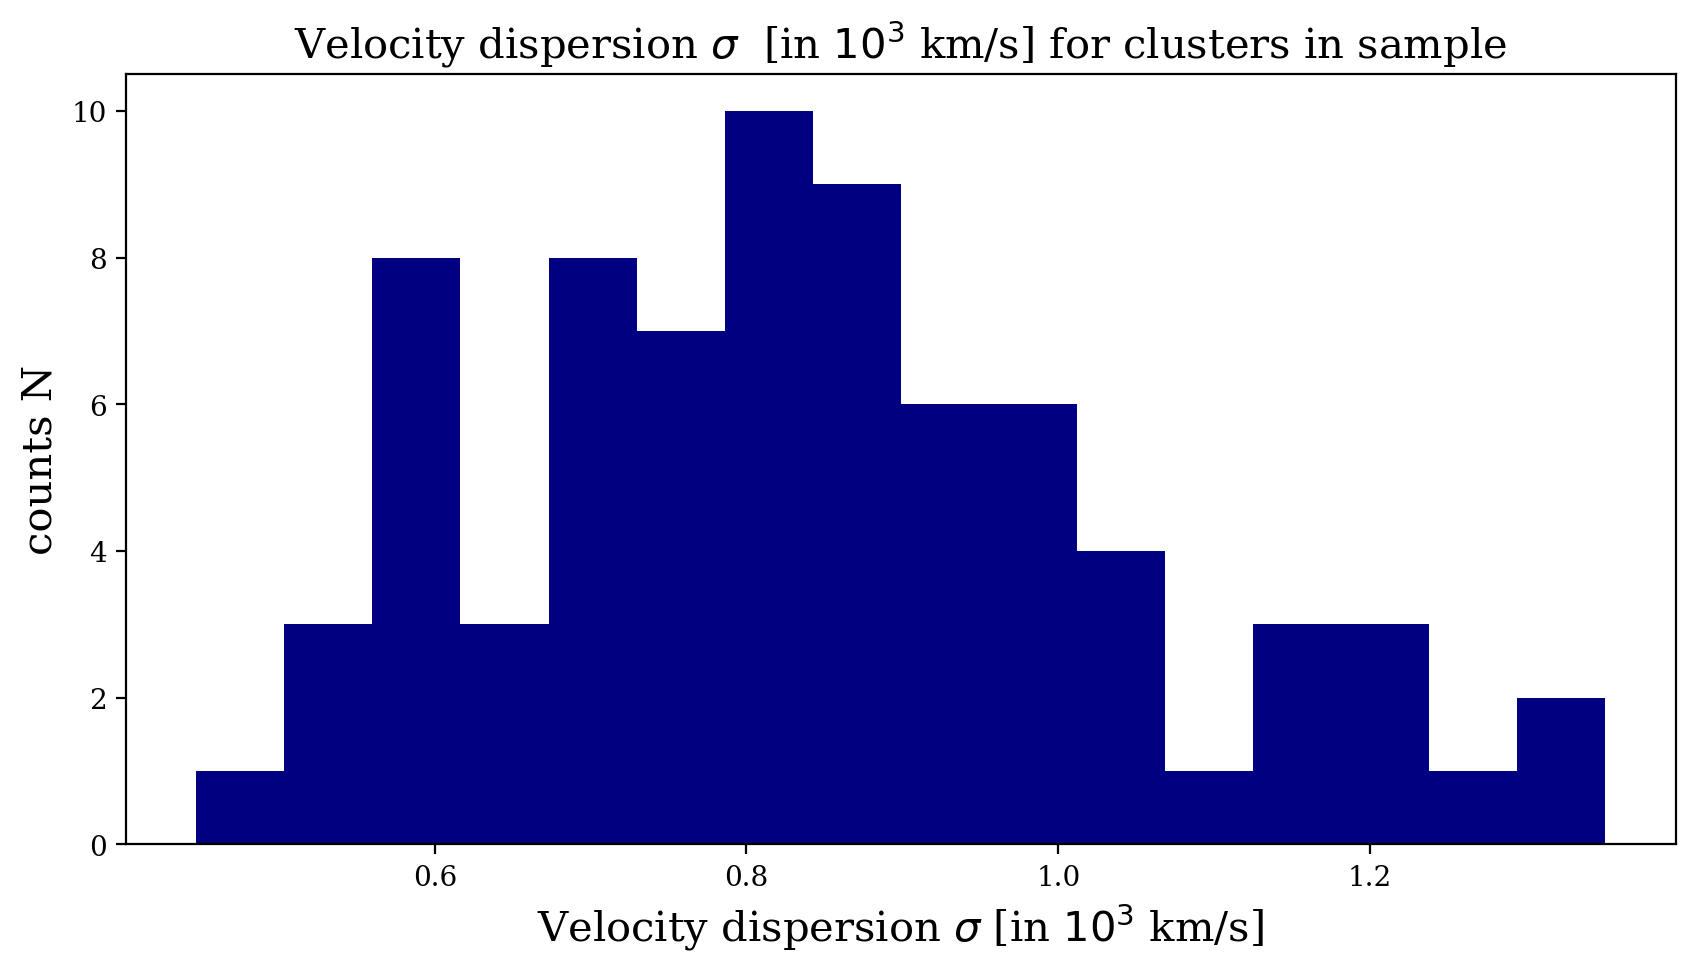

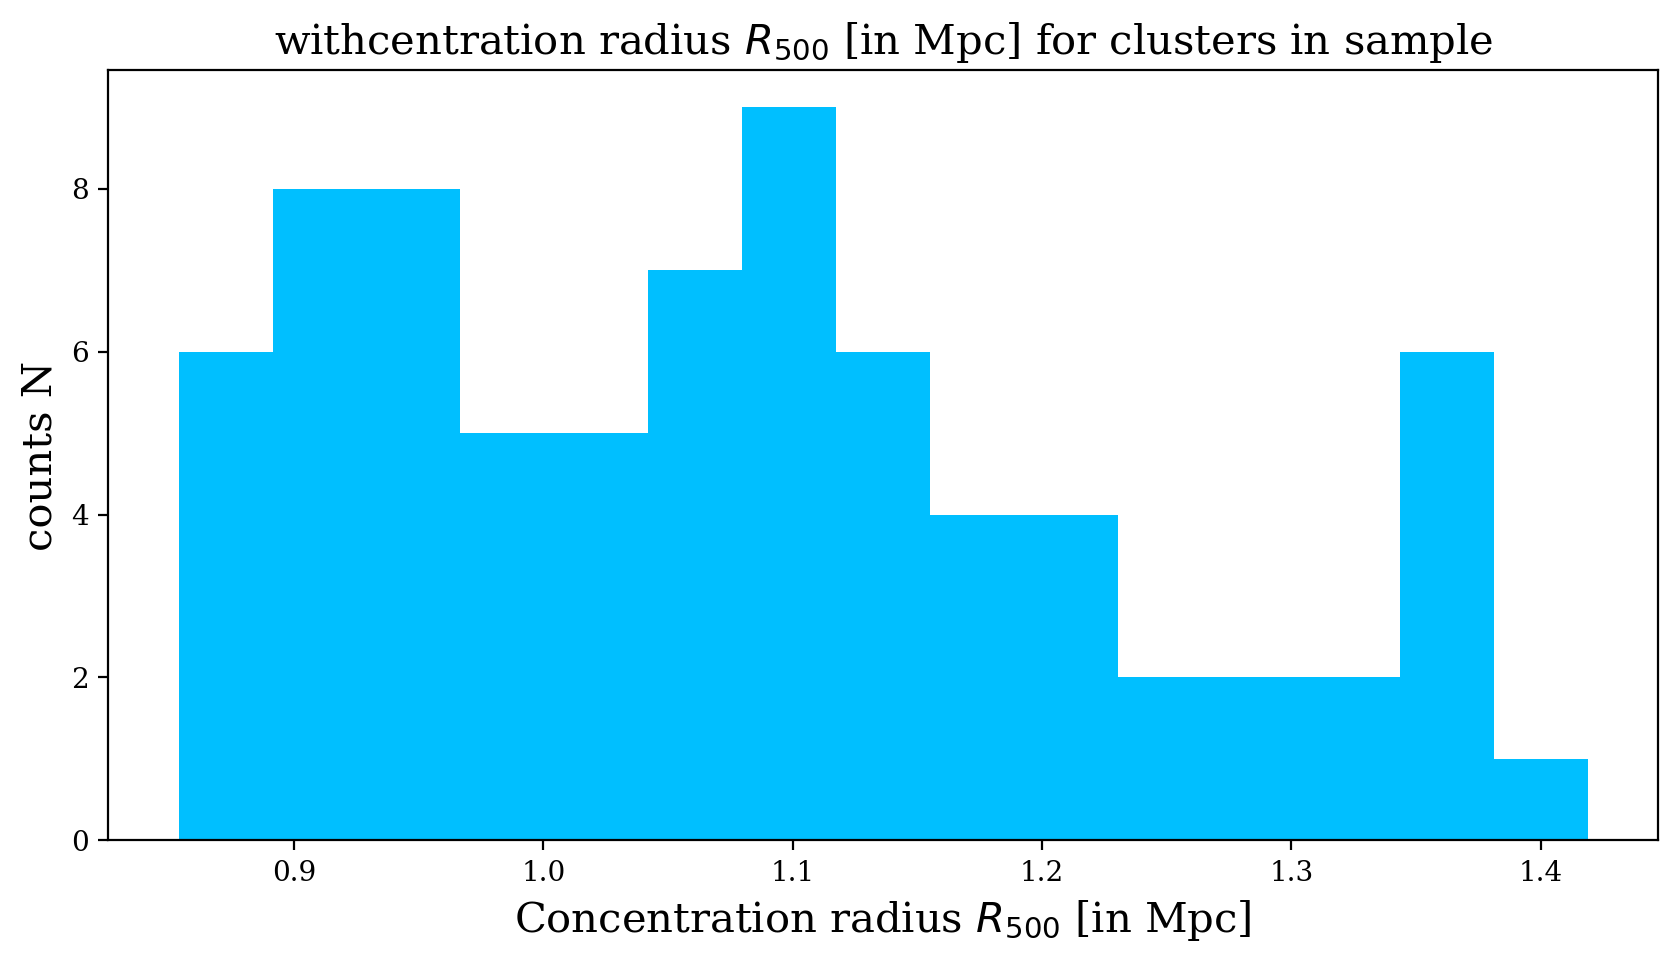

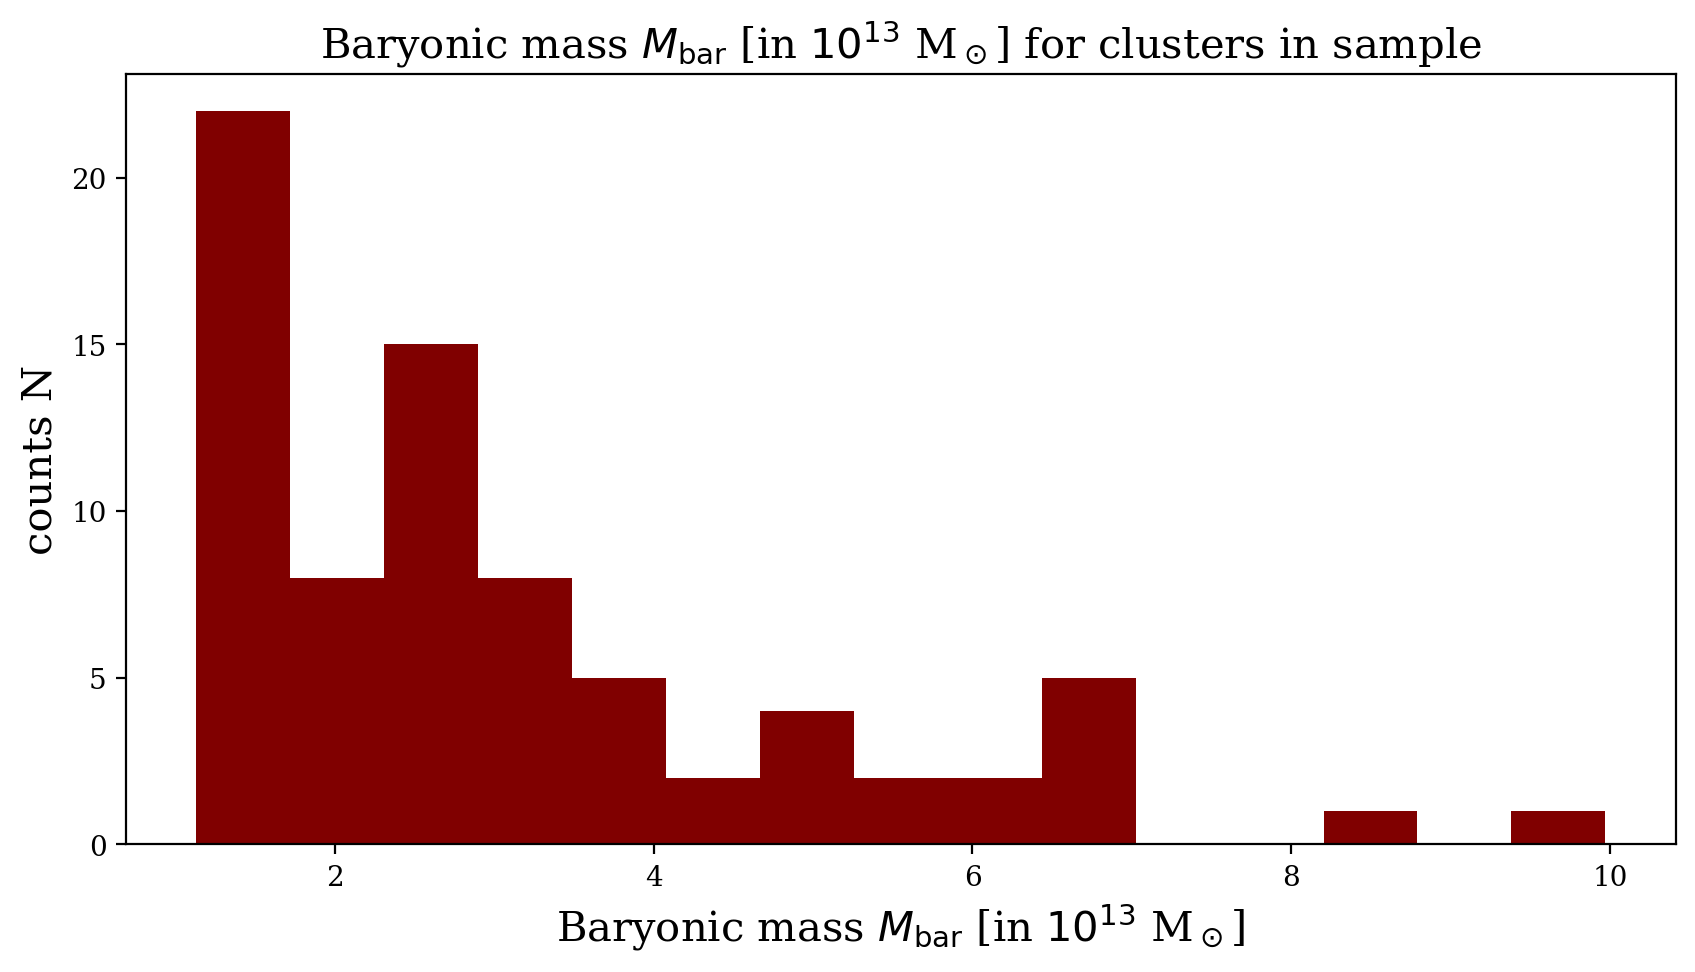

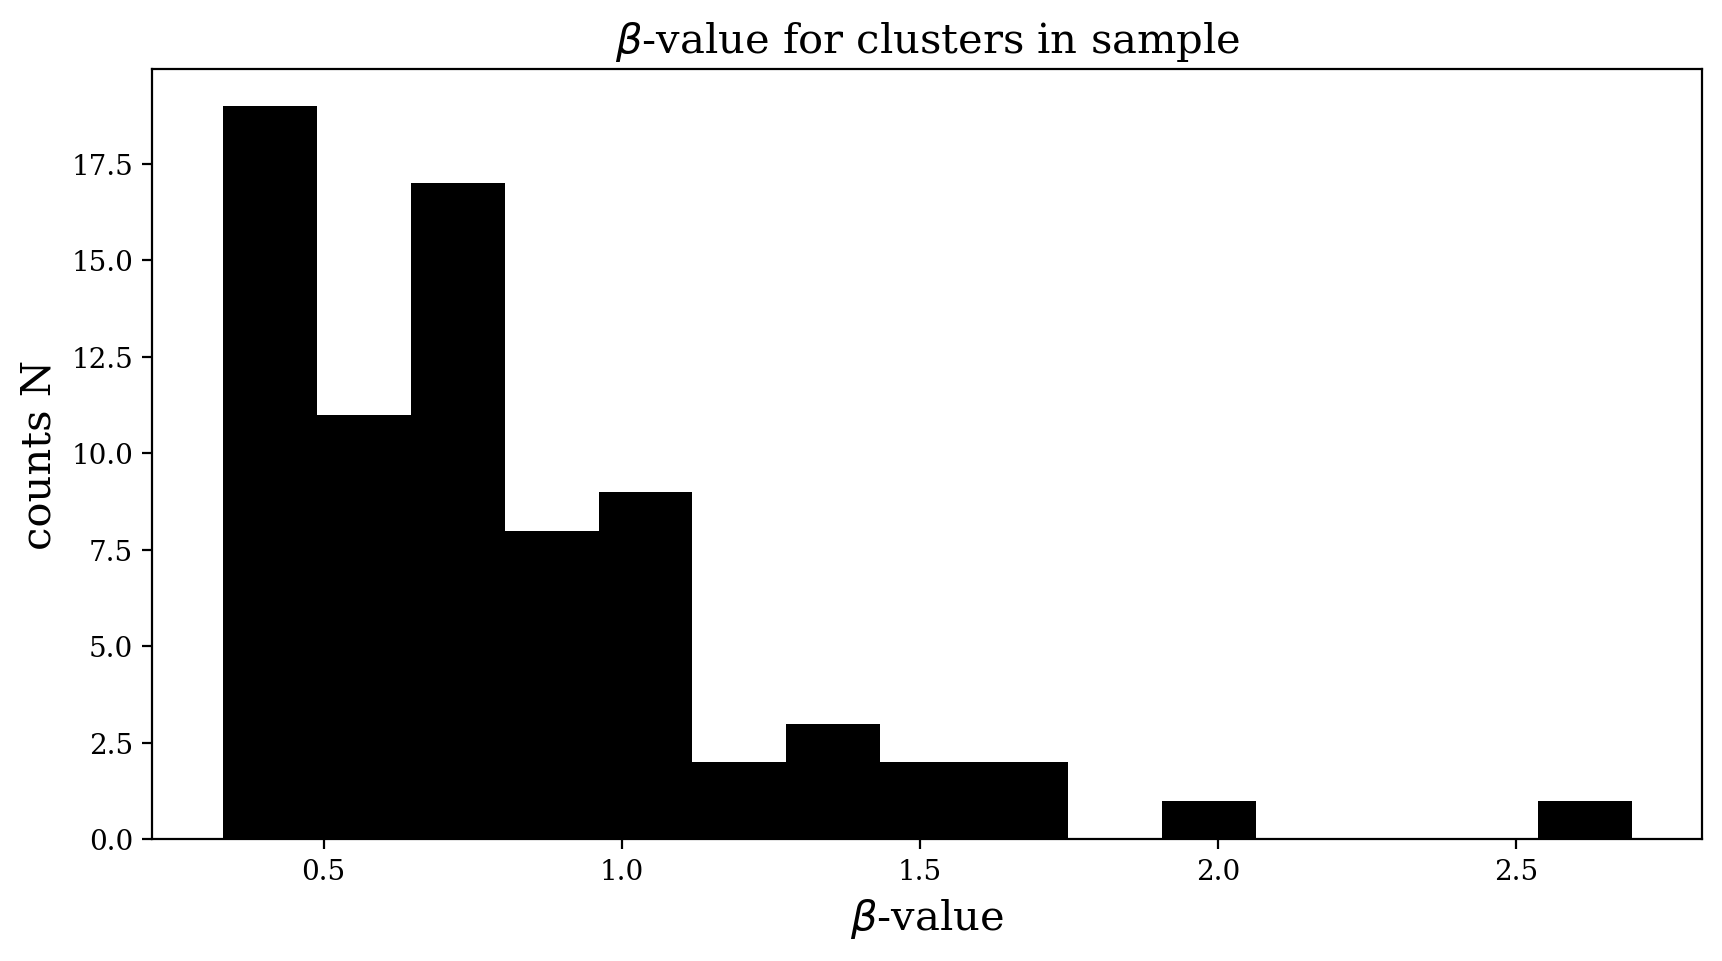

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(z, 16, density=True, histtype='stepfilled', facecolor='coral', alpha=0.75)
ax.set_title(f'redshift z for {N_CLUSTERS} clusters', fontsize = 15)
ax.set_xlabel("redshift z", 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_redshift_75_clusters.png', bbox_inches='tight') 
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
#ax.hist(L, 16, density=True, histtype='stepfilled', facecolor='darkturquoise', alpha=0.75)
ax.hist(L,16, histtype='stepfilled', facecolor='darkturquoise', alpha=0.75)
ax.set_title('Luminosity [in $10^{44}$ erg/s] for clusters in sample', fontsize = 15)
ax.set_xlabel("Luminosity [in $10^{44}$ erg/s]", 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_luminosity_75_clusters.png', bbox_inches='tight') 
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(T, 16, density=False, histtype='stepfilled', facecolor='forestgreen', rwidth=0.8)
ax.set_title(f'Temperature in [keV] for clusters in sample', fontsize = 15)
ax.set_xlabel("Temperature in [keV]", 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_temperature_75_clusters.png', bbox_inches='tight') 
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(vel_disp/(1e3), 16, density=False, histtype='stepfilled', facecolor='navy', rwidth=0.8)
ax.set_title(f'Velocity dispersion ' fr'$\sigma$  [in $10^3$ km/s] for clusters in sample', fontsize = 15)
ax.set_xlabel('Velocity dispersion ' fr'$\sigma$ [in $10^3$ km/s]', 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_velocity_dispersion_75_clusters.png', bbox_inches='tight') 
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(R, 15, density=False, histtype='stepfilled', facecolor='deepskyblue', rwidth=0.8)
ax.set_title('withcentration radius $R_{500}$ [in Mpc] for clusters in sample', fontsize = 15)
ax.set_xlabel('Concentration radius $R_{500}$ [in Mpc]', 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_radius_500_75_clusters.png', bbox_inches='tight') 
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(Mass_SM/(1e13), 15, density=False, histtype='stepfilled', facecolor='maroon', rwidth=0.8)
ax.set_title(r'Baryonic mass $M_{\mathrm{bar}}$ [in $10^{13}$ M$_\odot$] for clusters in sample', fontsize = 15)
ax.set_xlabel(r'Baryonic mass $M_{\mathrm{bar}}$ [in $10^{13}$ M$_\odot$]', 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_Mbar_75_clusters.png', bbox_inches='tight')
  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), dpi = DPI)
ax.hist(beta, 15, density=False, histtype='stepfilled', facecolor='black', rwidth=0.8)
ax.set_title(r'$\beta$-value for clusters in sample', fontsize = 15)
ax.set_xlabel(r'$\beta$-value', 
              fontsize=15)
ax.set_ylabel("counts N", 
              fontsize=15)
if (w == 1.0):
  plt.savefig(path_folder_histograms + 'histogram_beta_75_clusters.png', bbox_inches='tight')

In [53]:
print("SETTING THE X AND Y ARRAYS FOR THE MCMC")
X = v
Y = Mass
X_err = error_v
Y_err = error_Mass
error = (X_err*X_err+Y_err*Y_err)**0.5

SETTING THE X AND Y ARRAYS FOR THE MCMC


In [54]:
print("NWALKERS = ", nwalkers)
print("NITERATIONS = ", niter)
print("NBURNIN = ", nburnin)

NWALKERS =  100
NITERATIONS =  10000
NBURNIN =  6000


MCMC TIMES

In [55]:
Gb = G_PC_SM_KM_S*B_MOND*PC*1e-6
a = np.log10(Gb)
print(Gb)

0.01592549179240903


START OF MCMC ANALYSIS
Running burn-in...


100%|██████████| 6000/6000 [00:04<00:00, 1343.08it/s]


Running iterations...


100%|██████████| 10000/10000 [00:07<00:00, 1338.60it/s]


STATISTICS: CHI-SQUARED AND P-VALUE
CHI-SQUARED VALUE: 67.67770887425642
NUMBER OF DOF =  73
REDUCED CHI-SQUARED: 0.9270919023870743
P_VALUE =  0.6539876061116245
CONVERGENCE AND CORRELATION: AUTOCORRELATION TIME
59.140419847119105 is the autocorrelation time for the parameter 0
62.71436427363094 is the autocorrelation time for the parameter 1
CONVERGENCE AND CORRELATION: CHAINS
CONVERGENCE AND CORRELATION: AUTOCORRELATION TIME


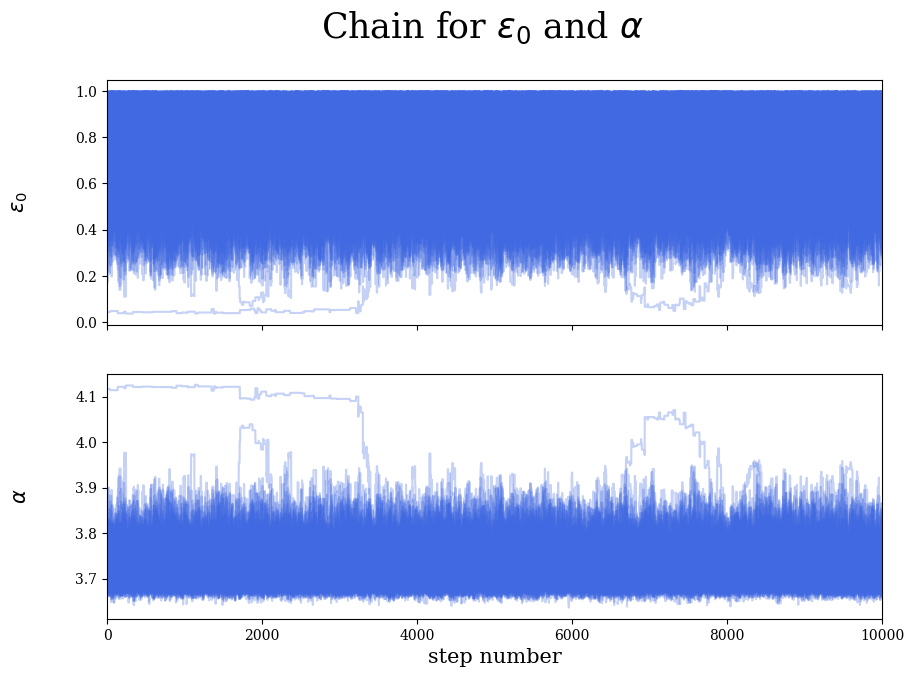

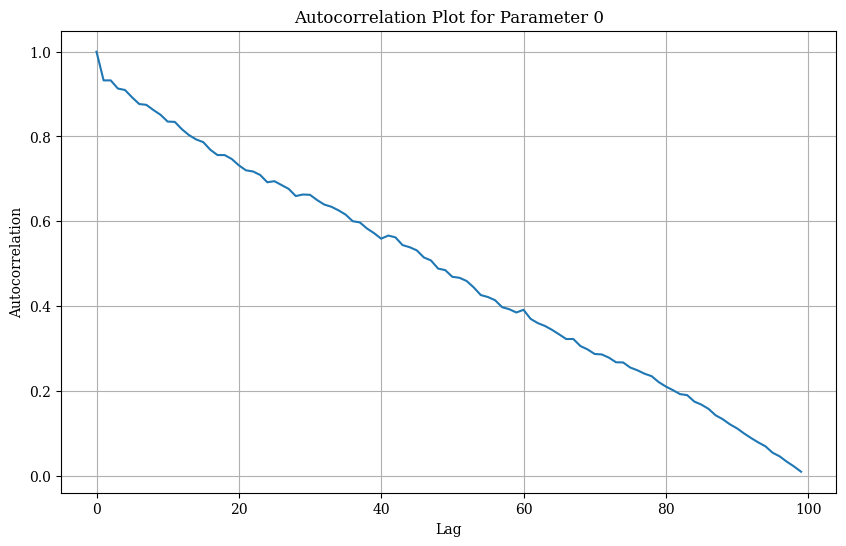

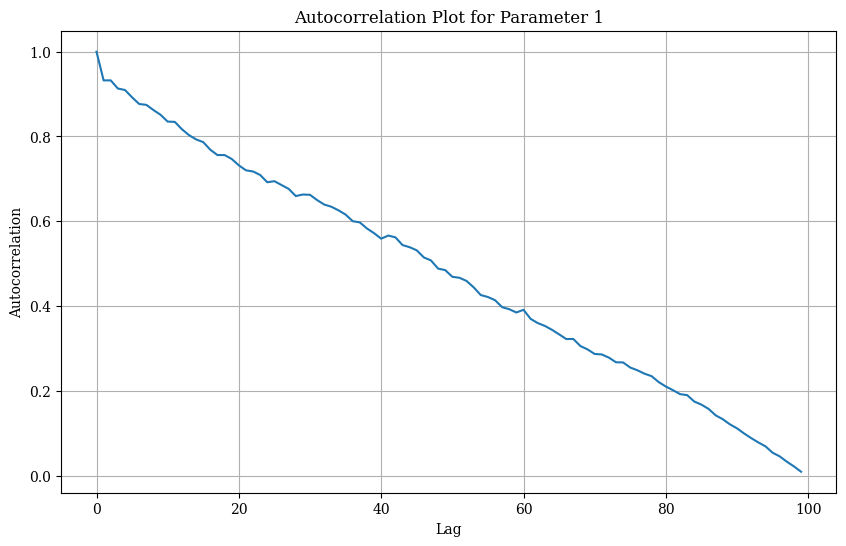

CONVERGENCE AND CORRELATION: INTEGRATED AUTOCORRELATION TIME


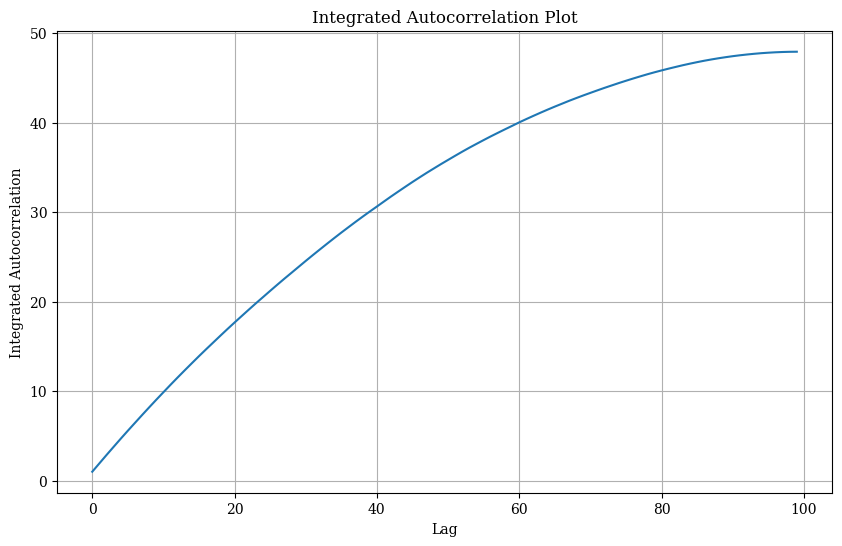

GELMAN-RUBIN TEST for parameter 0  = 0.9950333677476607
GELMAN-RUBIN TEST for parameter 1  = 0.9950296998340791
CONTOUR PLOTS TIME
Removed no burn in


<Figure size 600x450 with 0 Axes>

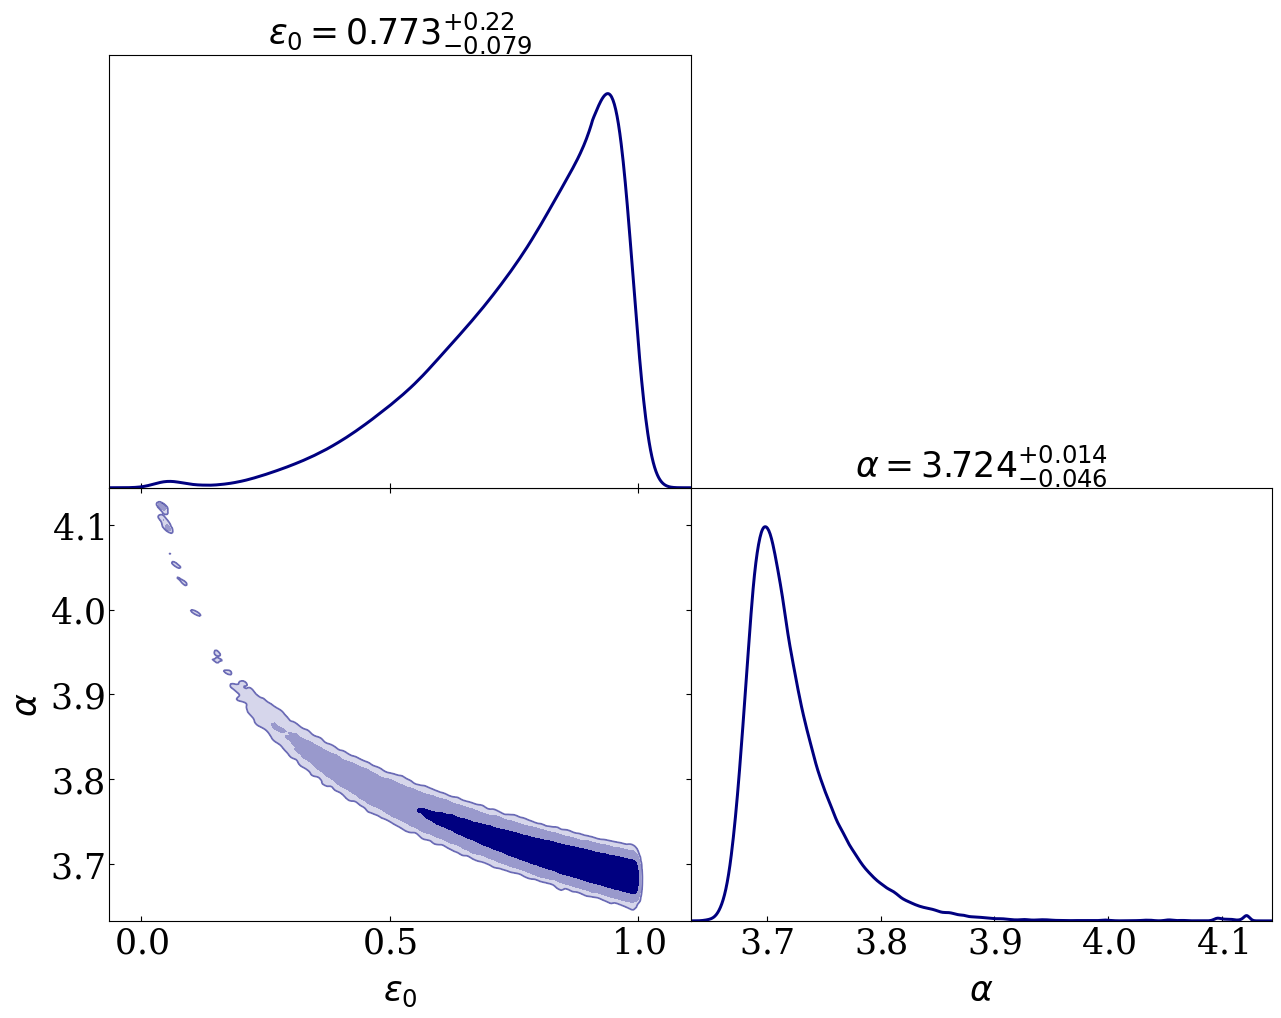

In [56]:
#############
if (ANALYSIS == 0):
        if (NPARAMS == 2):
            def model(theta,X=X):
                ep, B = theta
                return np.log10(ep) - a + B*X 
        elif (NPARAMS == 1):
            def model(theta,X=X):
                ep = theta
                return np.log10(ep) - a + 4*X
elif (ANALYSIS == 1):
        if (NPARAMS == 2):
            def model(theta,X=X):
                e0, P_density = theta
                Q_scelto = (CesEll_Q+CesDisk_Q)*0.5
                return np.log10(e0+0.5*(1-e0)*(np.tanh((Q_scelto/np.log(10))*(density_500_SI_units_log_10-P_density))+1)) - a + 4*X
        elif (NPARAMS == 3):
            def model(theta,X=X):
                ep, P_density, Q = theta
                return np.log10(ep+0.5*(1-ep)*(np.tanh((Q/np.log(10))*(density_500_SI_units_log_10-P_density))+1)) - a + 4.0*X 
        elif (NPARAMS == 4):
            def model(theta,X=X):
                ep, P_density, Q, B = theta
                return np.log10(ep+0.5*(1-ep)*(np.tanh((Q/np.log(10))*(density_500_SI_units_log_10-P_density))+1)) - a + B*X 
#############
#############
def lnlike(theta, X, Y, error):
    return -0.5 * np.sum(((Y - model(theta, X))/error) ** 2)
#############  
#############
def lnprior(theta):
    if (ANALYSIS == 0):
        if (NPARAMS == 2):
            ep, B = theta
            if ((0.00 < ep < 1.0) and (3.0 < B < 5.0)):
                return 0.0
            return -np.inf
        elif (NPARAMS == 1):
            ep = theta
            if (0.00 < ep < 1.0):
                return 0.0
            return -np.inf
    elif (ANALYSIS == 1):
        if (NPARAMS == 2):
            e0, P_density = theta
            if ((0.0 < e0 < 1.0) and (-27.00 < P_density < -20.0)):
                return 0.0
            return -np.inf
        elif (NPARAMS == 3):
            ep, crit_dens, Q = theta
            if ((0.00 < ep < 1.0) and (-27 < crit_dens < -24) and (0.01 < Q < 2.0)):
                return 0.0
            return -np.inf
        elif (NPARAMS == 4):
            ep, P_density, Q, B = theta
            if ((0.00 < ep < 1.0) and (-27 < P_density < -24) and (0.01 < Q < 2.0) and (3.0 < B < 5.0)):
                return 0.0
            return -np.inf
#############
#############
def lnprob(theta, X, Y, error):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, X, Y, error)
#############
#data
data = (X,Y,error)
if (ANALYSIS == 0):
  if (NPARAMS == 2):
    initial = np.array([0.15, 4.0])
  elif (NPARAMS == 1):
    initial = np.array([0.15])
elif (ANALYSIS == 1):
  if (NPARAMS == 2):
    initial = np.array([0.15, -25.0])
  elif (NPARAMS == 3):
    initial = np.array([0.15, -25.0, 1.0])
  elif (NPARAMS == 4):
    initial = np.array([0.150, -25.0, 1.0, 4.0])
ndim = len(initial) #il numero di dimensioni dello spazio dei parametri
dof = len(Y) - ndim
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
#############
#############
def chi_square(parameters, X, Y, error):
    predicted = model(parameters, X)
    return np.sum(((Y - predicted) / error) ** 2)
#############
print("START OF MCMC ANALYSIS")
def main(p0,nwalkers,niter,ndim,lnprob,data):

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)
    # lnprob è una funzione che prende un vettore nello spazio dei parametri come input e ritorna il logaritmo natuare della probabilità posterior in quella posizione.
    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, nburnin, progress=True)
    # sample.run_mcmc itera il sampler (sample()) per nsteps = nburnin e restituisce il risultato
    sampler.reset() #questo resetta i parametri alla scelta dei parametri iniziali

    print("Running iterations...")
    pos, prob, state = sampler.run_mcmc(p0, niter, progress=True)
    # sample.run_mcmc itera il sampler (sample()) per nsteps = niter e restituisce il risultato

    return sampler, pos, prob, state
##########
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)
samples = sampler.flatchain
samples[np.argmax(sampler.flatlnprobability)]
best_fit_parameters = samples[np.argmax(sampler.flatlnprobability)]
print("STATISTICS: CHI-SQUARED AND P-VALUE")
##########
chi_squared = chi_square(best_fit_parameters, X, Y, error)
print("CHI-SQUARED VALUE:", chi_squared)
print("NUMBER OF DOF = ", dof)
print("REDUCED CHI-SQUARED:", chi_squared/(dof))
p_value = 1 - stats.chi2.cdf(chi_squared, dof)
print("P_VALUE = ", p_value)
##########
print("CONVERGENCE AND CORRELATION: AUTOCORRELATION TIME")
tau = sampler.get_autocorr_time()
for i in range(ndim):
    print(tau[i], "is the autocorrelation time for the parameter", i)
##########
print("CONVERGENCE AND CORRELATION: CHAINS")
if (ndim > 1):
  fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
elif (ndim == 1):
  fig, ax = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
if (ANALYSIS == 0):
  if (NPARAMS == 2):
    labels = [r'$\epsilon_{0}$', 
             r'$\alpha$']
  elif (NPARAMS == 1):
    labels = [r'$\epsilon_{0}$']
elif (ANALYSIS == 1):
  if (NPARAMS == 2):
    labels = [r'$\epsilon_{0}$',
              r'$\mathcal{P}$']
  elif (NPARAMS == 3):
    labels = [r'$\epsilon_{0}$', 
             r'$\mathcal{P}$', 
             r'$Q$']  
  elif (NPARAMS == 4):
    labels = [r'$\epsilon_{0}$', 
             r'$\mathcal{P}$', 
             r'$Q$', 
             r'$\alpha$']
if (ndim > 1):
  for i in range(ndim):
      ax = axes[i]
      ax.plot(samples[:, :, i], color=color_chain, alpha=0.3)
      ax.set_xlim(0, len(samples))
      ax.set_ylabel(labels[i], fontsize=15)  # Imposta la dimensione dei label sull'asse y
      ax.yaxis.set_label_coords(-0.1, 0.5)
      ax.tick_params(axis='both', which='major', labelsize=10)  # Imposta la dimensione dei tick sugli assi
      axes[-1].set_xlabel("step number", fontsize=12)  # Imposta la dimensione del label sull'asse x
      axes[-1].tick_params(axis='both', which='major', labelsize=10)  # Imposta la dimensione dei tick sull'asse x
      axes[-1].set_xlabel("step number", fontsize=15)               
elif (ndim == 1):
  for i in range(ndim):
    ax.plot(samples[:, :, i], color=color_chain, alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], fontsize=15)  # Imposta la dimensione dei label sull'asse y
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)  # Imposta la dimensione dei tick sugli assi
    ax.set_xlabel("step number", fontsize=12)  # Imposta la dimensione del label sull'asse x
    ax.tick_params(axis='both', which='major', labelsize=10)  # Imposta la dimensione dei tick sull'asse x
    ax.set_xlabel("step number", fontsize=15)              
if (ANALYSIS == 0):
  if (NPARAMS == 2):
    plt.suptitle("Chain for $\epsilon_{0}$ and $\\alpha$", fontsize=25)
  elif (NPARAMS == 1):
    plt.suptitle("Chain for $\epsilon_{0}$", fontsize=25)
elif (ANALYSIS == 1):
  if (NPARAMS == 2):
    plt.suptitle(r'Chain for $\epsilon_{0}$ and $\mathcal{P}$', fontsize=25)
  elif (NPARAMS == 3):
    plt.suptitle(r'Chain for $\epsilon_{0}$, $\mathcal{P}$ and Q', fontsize=25)
  elif (NPARAMS == 4):
    plt.suptitle(r'Chain for $\epsilon_{0}$, $\mathcal{P}$, Q and $\alpha$', fontsize=25)
    
print("CONVERGENCE AND CORRELATION: AUTOCORRELATION TIME")

def plot_autocorrelation(chain, parameter_index):
    autocorr = np.correlate(chain, chain, mode='full')
    autocorr = autocorr / np.max(autocorr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(autocorr[len(autocorr)//2:])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Plot for Parameter {}'.format(parameter_index))
    plt.grid(True)
    plt.show()

chain = samples[0,:,0]

for i in range(ndim):
    plot_autocorrelation(chain, i)
    
print("CONVERGENCE AND CORRELATION: INTEGRATED AUTOCORRELATION TIME")

def integrated_autocorrelation(chain):
    autocorr = np.correlate(chain, chain, mode='full')
    autocorr = autocorr / np.max(autocorr)
    return np.cumsum(autocorr[len(autocorr)//2:])
def plot_integrated_autocorrelation(chain):
    iacf = integrated_autocorrelation(chain)
    plt.figure(figsize=(10, 6))
    plt.plot(iacf)
    plt.xlabel('Lag')
    plt.ylabel('Integrated Autocorrelation')
    plt.title('Integrated Autocorrelation Plot')
    plt.grid(True)
    plt.show()

chain = samples[0,:,0]
plot_integrated_autocorrelation(chain)

def gelman_rubin(chains):
    nwalkers, nsteps, ndim = chains.shape
    means = np.mean(chains, axis=1)
    variances = np.var(chains, axis=1, ddof=1)    
    mean_means = np.mean(means, axis=0)
    between_chain_variance = nsteps / (nwalkers - 1) * np.sum((means - mean_means)**2, axis=0)
    within_chain_variance = np.mean(variances, axis=0)
    scale_factor = (nsteps - 1) / nsteps + (between_chain_variance / within_chain_variance) * (1 / nwalkers)
    return np.sqrt(scale_factor)

samples = sampler.get_chain()
for i in range(ndim):
    R_hat = gelman_rubin(samples)
    print("GELMAN-RUBIN TEST for parameter",i," =", R_hat[i])

print("CONTOUR PLOTS TIME")

g = plots.get_single_plotter()
if (ANALYSIS == 0):
  if (NPARAMS == 2):
    names_MCS = [r'\epsilon_{0}',
                 r'\alpha']
    labels_MCS = [r'\epsilon_{0}', 
                  r'\alpha']
  elif (NPARAMS == 1):
    names_MCS = [r'\epsilon_{0}']
    labels_MCS = [r'\epsilon_{0}']
elif (ANALYSIS == 1):
  if (NPARAMS == 2):
    names_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}']
    labels_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}']
  elif (NPARAMS == 3):
    names_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}', 
             r'Q']
    labels_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}', 
             r'Q']
  elif (NPARAMS == 4):
    names_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}', 
             r'Q', 
             r'\alpha']
    labels_MCS = [r'\epsilon_{0}', 
             r'log_{10}\rho_{c}', 
             r'Q', 
             r'\alpha']
samples_gd = MCSamples(samples=samples, 
                       names=names_MCS, 
                       labels=labels_MCS)
g.settings.axes_labelsize = 25
g.settings.fig_width_inch = 15
g.settings.fontsize = 25
g.settings.line_labels = True
g.settings.axis_tick_max_labels = 25
g.settings.title_limit_fontsize = 25
g.settings.num_plot_contours = 3
g.settings.axes_fontsize = 25
g.triangle_plot(samples_gd, 
                filled=True, 
                line_labels=True, 
                progress=True,
                contour_colors=[color_cornerplot],
                title_limit=1,
                quantiles=[0.15865, 0.5, 0.84135] #0.15865 upper bound, 0.5 median, 0.84135 upper bound
                #quantiles=[0.0015,0.5,0.9985]
                )
if (TEST == 1):
  if (ANALYSIS == 0):
    if (NPARAMS == 2):
      if (w == 1.0):
        plt.savefig(path_folder_cornerplots + f'posterior_distribution_eps_alpha_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      elif (w == 1.3):
        plt.savefig(path_folder_cornerplots_130 + f'posterior_distribution_eps_alpha_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      plt.suptitle("Posterior distribution for $\epsilon_{0}$ and $\\alpha$", fontsize=25)
    elif (NPARAMS == 1):
      if (w == 1.0):
        plt.savefig(path_folder_cornerplots + f'posterior_distribution_eps_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      elif (w == 1.3):
        plt.savefig(path_folder_cornerplots_130 + f'posterior_distribution_eps_{N_CLUSTERS}_clusters.png', bbox_inches='tight')      
      plt.suptitle("Posterior distribution for $\epsilon_{0}$", fontsize=25)
  elif (ANALYSIS == 1):
    if (NPARAMS == 2):
      if (w == 1.0):
        plt.savefig(path_folder_cornerplots + f'posterior_distribution_eps_rhoc_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      elif (w == 1.3):
        plt.savefig(path_folder_cornerplots_130 + f'posterior_distribution_eps_rhoc_{N_CLUSTERS}_clusters.png', bbox_inches='tight')      
      plt.suptitle(r'Posterior distribution for $\epsilon_{0}$ and $\mathcal{P}$', fontsize=25)
    elif (NPARAMS == 3):
      if (w == 1.0):
        plt.savefig(path_folder_cornerplots + f'posterior_distribution_eps_rhoc_Q_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      elif (w == 1.3):
        plt.savefig(path_folder_cornerplots_130 + f'posterior_distribution_eps_rhoc_Q_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      plt.suptitle(r'Posterior distribution for $\epsilon_{0}$, $\mathcal{P}$ and Q', fontsize=25)
    elif (NPARAMS == 4):
      if (w == 1.0):
        plt.savefig(path_folder_cornerplots + f'posterior_distribution_eps_rhoc_Q_alpha_{N_CLUSTERS}_clusters.png', bbox_inches='tight')
      elif (w == 1.3):
        plt.savefig(path_folder_cornerplots_130 + f'posterior_distribution_eps_rhoc_Q_alpha_{N_CLUSTERS}_clusters.png', bbox_inches='tight')      
      plt.suptitle(r'Posterior distribution for $\epsilon_{0}$, $\mathcal{P}$, Q and $\alpha$', fontsize=25)

In [57]:
if (ANALYSIS == 0):
  if (NPARAMS == 2):
    eps0_fin = np.mean(samples_gd[0])
    alpha_fin = np.mean(samples_gd[1])
    #comparison with Cesare et al 2022
    ########
    ########
    #first parameter
    M1 = eps0_fin
    N1 = CesEll_eps0
    unc_M1_p = 0.22
    unc_M1_m = 0.075
    unc_N1_p = unc_CesEll_eps0_p
    unc_N1_m = unc_CesEll_eps0_m
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print(f'{names_MCS[0]} is away from the value in Cesare et al. 2022', Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    N1 = CesDisk_eps0
    unc_N1_p = unc_CesDisk_eps0
    unc_N1_m = unc_CesDisk_rhoc
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print(f'{names_MCS[0]} is away from the value in Cesare et al. 2020', Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #second parameter
    M2 = alpha_fin
    N2 = slope_BTFR
    unc_M2_p = 0.015
    unc_M2_m = 0.045
    unc_N2_p = unc_slope_BTFR_p
    unc_N2_m = unc_slope_BTFR_m
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print(f'{names_MCS[1]} is away from the value of the BTFR slope', Delta_M_N2/Delta_unc_2, "sigma")
  elif (NPARAMS == 1):
    eps0_fin = np.mean(samples_gd[0])
    print(eps0_fin)
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    M1 = eps0_fin
    N1 = CesEll_eps0
    unc_M1_p = 0.0081
    unc_M1_m = 0.0097
    unc_N1_p = unc_CesEll_eps0_p
    unc_N1_m = unc_CesEll_eps0_m
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon is away from the value in Cesare et al. 2022", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    N1 = CesDisk_eps0
    unc_N1_p = unc_CesDisk_eps0
    unc_N1_m = unc_CesDisk_rhoc
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon is away from the value in Cesare et al. 2020", Delta_M_N1/Delta_unc_1, "sigma")
if (ANALYSIS == 1):
  if (NPARAMS == 4):
    eps0_fin = np.mean(samples_gd[0])
    rhoc_fin = np.mean(samples_gd[1])
    Q_fin = np.mean(samples_gd[2])
    alpha_fin = np.mean(samples_gd[3])
    #comparison with Cesare et al 2022
    ########
    ########
    #first parameter
    M1 = eps0_fin
    N1 = CesEll_eps0
    unc_M1_p = 0.088
    unc_M1_m = 0.35
    unc_N1_p = unc_CesEll_eps0_p
    unc_N1_m = unc_CesEll_eps0_m
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2022", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    N1 = CesDisk_eps0
    unc_N1_p = unc_CesDisk_eps0
    unc_N1_m = unc_CesDisk_eps0
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2020", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #second parameter
    M2 = rhoc_fin
    N2 = CesDisk_rhoc
    unc_M2_p = 0.71
    unc_M2_m = 1.8
    unc_N2_p = unc_CesDisk_rhoc
    unc_N2_m = unc_CesDisk_rhoc
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2020", Delta_M_N2/Delta_unc_2, "sigma")
    ########
    ########
    #second parameter
    N2 = CesEll_rhoc
    unc_N2_p = unc_CesEll_rhoc_p
    unc_N2_m = unc_CesEll_rhoc_m
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2022", Delta_M_N2/Delta_unc_2, "sigma")
    #comparison with Cesare et al 2022
    ########
    ########
    #third parameter
    M3 = Q_fin
    N3 = CesEll_Q
    unc_M3_p = 0.67
    unc_M3_m = 0.26
    unc_N3_p = unc_CesEll_Q_p
    unc_N3_m = unc_CesEll_Q_m
    if (M3 > N3):
      delta_M3 = unc_M3_m
      delta_N3 = unc_N3_p
    else:
      delta_M3 = unc_M3_p
      delta_N3 = unc_N3_m
    #M-N
    Delta_M_N3 = np.abs(M3-N3)
    #Delta_M - Delta_N
    Delta_unc_3 = np.sqrt(delta_M3*delta_M3+delta_N3*delta_N3)
    print("Q is away from the value in Cesare et al. 2022", Delta_M_N3/Delta_unc_3, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #third parameter
    N3 = CesDisk_Q
    unc_N3_p = unc_CesDisk_Q
    unc_N3_m = unc_CesDisk_Q
    if (M3 > N3):
      delta_M3 = unc_M3_m
      delta_N3 = unc_N3_p
    else:
      delta_M3 = unc_M3_p
      delta_N3 = unc_N3_m
    #M-N
    Delta_M_N3 = np.abs(M3-N3)
    #Delta_M - Delta_N
    Delta_unc_3 = np.sqrt(delta_M3*delta_M3+delta_N3*delta_N3)
    print("Q is away from the value in Cesare et al. 2020", Delta_M_N3/Delta_unc_3, "sigma")
    ########
    ########
    #fourth parameter
    M4 = alpha_fin
    N4 = slope_BTFR
    unc_M4_p = 0.026
    unc_M4_m = 0.080
    unc_N4_p = unc_slope_BTFR_p
    unc_N4_m = unc_slope_BTFR_m
    if (M4 > N4):
      delta_M4 = unc_M4_m
      delta_N4 = unc_N4_p
    else:
      delta_M4 = unc_M4_p
      delta_N4 = unc_N4_m
    Delta_M_N4 = np.abs(M4-N4)
    Delta_unc_4 = np.sqrt(delta_M4*delta_M4+delta_N4*delta_N4)
    print("alpha is away from the value of the critical density in BTFR", Delta_M_N4/Delta_unc_4, "sigma")
    ########
    ########
  elif (NPARAMS == 3):
    eps0_fin = np.mean(samples_gd[0])
    rhoc_fin = np.mean(samples_gd[1])
    Q_fin = np.mean(samples_gd[2])
    #comparison with Cesare et al 2022
    ########
    ########
    #first parameter
    M1 = eps0_fin
    N1 = CesEll_eps0
    unc_M1_p = 0.016
    unc_M1_m = 0.023
    unc_N1_p = unc_CesEll_eps0_p
    unc_N1_m = unc_CesEll_eps0_m
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2022", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    N1 = CesDisk_eps0
    unc_N1_p = unc_CesDisk_eps0
    unc_N1_m = unc_CesDisk_eps0
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2020", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #second parameter
    M2 = rhoc_fin
    N2 = CesDisk_rhoc
    unc_M2_p = 0.11
    unc_M2_m = 0.48
    unc_N2_p = unc_CesDisk_rhoc
    unc_N2_m = unc_CesDisk_rhoc
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2020", Delta_M_N2/Delta_unc_2, "sigma")
    ########
    ########
    #second parameter
    N2 = CesEll_rhoc
    unc_N2_p = unc_CesEll_rhoc_p
    unc_N2_m = unc_CesEll_rhoc_m
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2022", Delta_M_N2/Delta_unc_2, "sigma")
    #comparison with Cesare et al 2022
    ########
    ########
    #third parameter
    M3 = Q_fin
    N3 = CesEll_Q
    unc_M3_p = 0.38
    unc_M3_m = 0.12
    unc_N3_p = unc_CesEll_Q_p
    unc_N3_m = unc_CesEll_Q_m
    if (M3 > N3):
      delta_M3 = unc_M3_m
      delta_N3 = unc_N3_p
    else:
      delta_M3 = unc_M3_p
      delta_N3 = unc_N3_m
    #M-N
    Delta_M_N3 = np.abs(M3-N3)
    #Delta_M - Delta_N
    Delta_unc_3 = np.sqrt(delta_M3*delta_M3+delta_N3*delta_N3)
    print("Q is away from the value in Cesare et al. 2022", Delta_M_N3/Delta_unc_3, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #third parameter
    N3 = CesDisk_Q
    unc_N3_p = unc_CesDisk_Q
    unc_N3_m = unc_CesDisk_Q
    if (M3 > N3):
      delta_M3 = unc_M3_m
      delta_N3 = unc_N3_p
    else:
      delta_M3 = unc_M3_p
      delta_N3 = unc_N3_m
    #M-N
    Delta_M_N3 = np.abs(M3-N3)
    #Delta_M - Delta_N
    Delta_unc_3 = np.sqrt(delta_M3*delta_M3+delta_N3*delta_N3)
    print("Q is away from the value in Cesare et al. 2020", Delta_M_N3/Delta_unc_3, "sigma")
    ########
    ########
  elif (NPARAMS == 2):
    eps0_fin = np.mean(samples_gd[0])
    rhoc_fin = np.mean(samples_gd[1])
    #comparison with Cesare et al 2022
    ########
    ########
    #first parameter
    M1 = eps0_fin
    N1 = CesEll_eps0
    unc_M1_p = 0.011
    unc_M1_m = 0.036
    unc_N1_p = unc_CesEll_eps0_p
    unc_N1_m = unc_CesEll_eps0_m
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2022", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #comparison with Cesare et al 2020
    ########
    ########
    #first parameter
    N1 = CesDisk_eps0
    unc_N1_p = unc_CesDisk_eps0
    unc_N1_m = unc_CesDisk_eps0
    if (M1 > N1):
      delta_M1 = unc_M1_m
      delta_N1 = unc_N1_p
    else:
      delta_M1 = unc_M1_p
      delta_N1 = unc_N1_m
    #M-N
    Delta_M_N1 = np.abs(M1-N1)
    #Delta_M - Delta_N
    Delta_unc_1 = np.sqrt(delta_M1*delta_M1+delta_N1*delta_N1)
    print("epsilon_0 is away from the value in Cesare et al. 2020", Delta_M_N1/Delta_unc_1, "sigma")
    ########
    ########
    #second parameter
    M2 = rhoc_fin
    N2 = CesEll_rhoc
    unc_M2_p = 0.17
    unc_M2_m = 0.73
    unc_N2_p = unc_CesEll_rhoc_p
    unc_N2_m = unc_CesEll_rhoc_m
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2022", Delta_M_N2/Delta_unc_2, "sigma")
    ########
    ########
    #second parameter
    N2 = CesDisk_rhoc
    unc_N2_p = unc_CesDisk_rhoc
    unc_N2_m = unc_CesDisk_rhoc
    if (M2 > N2):
      delta_M2 = unc_M2_m
      delta_N2 = unc_N2_p
    else:
      delta_M2 = unc_M2_p
      delta_N2 = unc_N2_m
    Delta_M_N2 = np.abs(M2-N2)
    Delta_unc_2 = np.sqrt(delta_M2*delta_M2+delta_N2*delta_N2)
    print("rho_c is away from the value of the critical density in Cesare et al. 2020", Delta_M_N2/Delta_unc_2, "sigma")

\epsilon_{0} is away from the value in Cesare et al. 2022 8.138131306264365 sigma
\epsilon_{0} is away from the value in Cesare et al. 2020 1.2067078193171445 sigma
\alpha is away from the value of the BTFR slope 2.1128990930411353 sigma


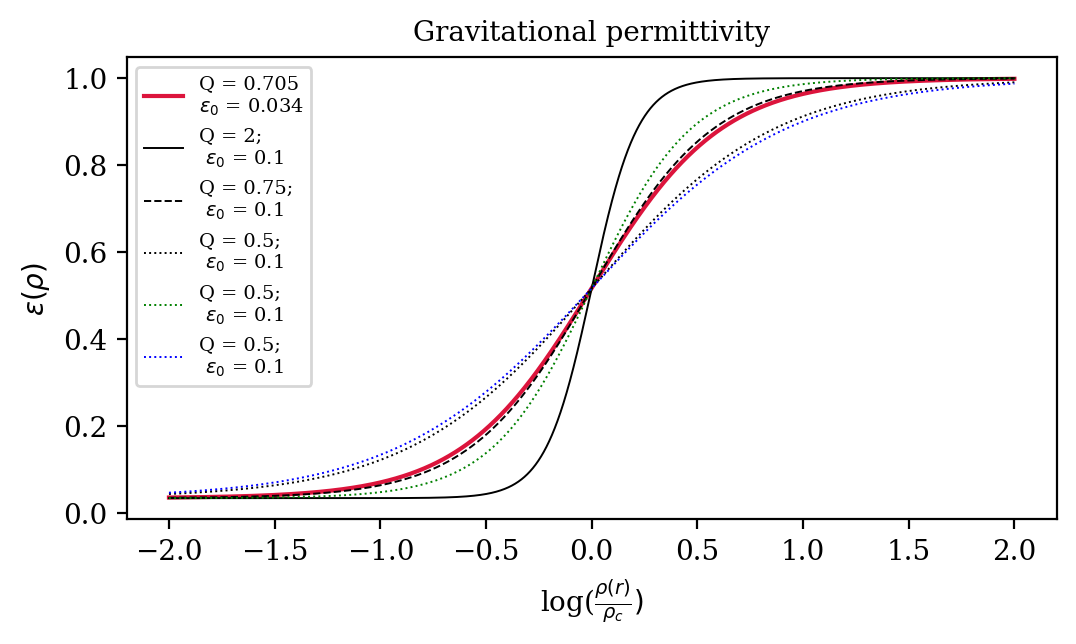

In [58]:
Q_plot_function = 0.705
epsilon_0_plot_function = 0.034
rho_c_plot_function = 10**(-26)
q_1 = 2
q_2 = 0.75
q_3 = 0.5
e0_1 = 0.1
ics = np.linspace(1e-28,1e-24,10000000)
e0_2020 = 0.56
Q_2020 =  0.92
e0_2022 = 0.089
Q_2022 = 0.47

def func(ics,epsilon_0_plot_function,Q_plot_function,rho_c_plot_function):
    #return epsilon_0_plot_function+0.5*(1-epsilon_0_plot_function)*(np.tanh((Q_plot_function/np.log(10))*(ics-rho_c_plot_function))+1)
    return 0.034 + (1-0.034)*0.5*(np.tanh(np.log((ics/rho_c_plot_function)**Q_plot_function))+1)
fig, ax = plt.subplots(figsize=(6,3), dpi=DPI)
ax.set_title("Gravitational permittivity", 
             fontsize=10)
ax.set_xlabel(r'log($\frac{\rho(r)}{\rho_c})$', 
              fontsize=10)
ax.set_ylabel(r'$\epsilon(\rho)$', 
              fontsize=10)
epsilon_rho = func(ics,epsilon_0_plot_function, Q_plot_function, rho_c_plot_function)
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         epsilon_rho, 
         label=r'Q = {:.4g};$\epsilon_0$ = {:.2g}'.format(Q_plot_function, epsilon_0_plot_function).replace(';', '\n'), 
         color='crimson')
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         func(ics,e0_1, q_1, rho_c_plot_function), 
         label=r'Q = {:.4g}; $\epsilon_0$ = {:.2g}'.format(q_1, e0_1).replace(';', ';\n'), 
         color='black', 
         linewidth = 0.7)
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         func(ics,e0_1, q_2, rho_c_plot_function), 
         label=r'Q = {:.4g}; $\epsilon_0$ = {:.2g}'.format(q_2, e0_1).replace(';', ';\n'), 
         color='black', 
         linestyle='dashed', 
         linewidth = 0.7)
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         func(ics,e0_1, q_3, rho_c_plot_function), 
         label=r'Q = {:.4g}; $\epsilon_0$ = {:.2g}'.format(q_3, e0_1).replace(';', ';\n'), 
         color='black', 
         linestyle='dotted', 
         linewidth = 0.7)
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         func(ics,e0_2020, Q_2020, rho_c_plot_function), 
         label=r'Q = {:.4g}; $\epsilon_0$ = {:.2g}'.format(q_3, e0_1).replace(';', ';\n'), 
         color='green', 
         linestyle='dotted', 
         linewidth = 0.7)
plt.plot(np.log10((ics/(rho_c_plot_function))), 
         func(ics,e0_2022, Q_2022, rho_c_plot_function), 
         label=r'Q = {:.4g}; $\epsilon_0$ = {:.2g}'.format(q_3, e0_1).replace(';', ';\n'), 
         color='blue', 
         linestyle='dotted', 
         linewidth = 0.7)

ax.legend(loc="upper left", prop={"size":7})
ax.tick_params(axis='both', which='major', labelsize=10)
#'Velocity dispersion ' fr'$\sigma$ [in $10^3$ km/s]'
plt.show()